# **Problem Statement**

With many of the HDB flats now selling over 1 million dollars, there is a need to have a better understanding of why these flats are selling at these skyrocketing prices. Are these flats overvalued or are the prices justifable? This is where we, as data analysts need to come in and create a model to ensure that the selling price adheres to normal market standards. 

# HDB Resale Prices Predictive Modeling

In Singapore, public housing are known as HDB flats, where HDB stands for Housing Development Board. HDB is Singapore's public housing authority and a statutory board under the Ministry of National Development.

In this project, a HDB Resale Prices Predictive Modeling will be created to predict the selling price of a particular flat based on several attributes such as:-
- Location
- Size of the Flat
- Storey Level of the Flat
- Age of the Flat
- Proximity to amenities (Markets/Malls/Hawker Centers)
- Proximity to public transport (MRT/Bus)
- Proximity to education institutions (primary and secondary schools)

## 1. Load Libraries and Dataset

In [46]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [47]:
# Display max rows & columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [48]:
# Reading in the HDB train data
house=pd.read_csv('./datasets/train.csv')
house_test=pd.read_csv('./datasets/test.csv')

## 2. Exploratory Data Analysis and Data Cleaning

In [49]:
# Checking the info of the train.csv
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 77 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   Tranc_YearMonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  Tranc_Year                 150634 non-null  int64  
 12  Tranc_Month                150634 non-null  int64  
 13  mid_storey                 15

### 2.1 Missing/Null Values 

In exploratory data analysis (EDA), missing values refer to the absence of data in one or more columns or variables of a dataset. They are also known as null values. There are 7 columns that contains null values. 

In [50]:
# Checking for any null values
house.isnull().sum()[house.isnull().sum() > 0]

Mall_Nearest_Distance      829
Mall_Within_500m         92789
Mall_Within_1km          25426
Mall_Within_2km           1940
Hawker_Within_500m       97390
Hawker_Within_1km        60868
Hawker_Within_2km        29202
dtype: int64

In [51]:
# Creating a new dataframe with those columns having the null values
house_null = house.iloc[: , 46:54].copy().drop(columns='Hawker_Nearest_Distance')
house_null

Mall_Within_500m  Mall_Within_1km  Mall_Within_2km  \
0                    NaN              NaN              7.0   
1                    NaN              1.0              3.0   
2                    NaN              NaN              4.0   
3                    NaN              1.0              4.0   
4                    NaN              1.0              2.0   
...                  ...              ...              ...   
150629               NaN              4.0              6.0   
150630               1.0              1.0              4.0   
150631               NaN              NaN              2.0   
150632               NaN              3.0              3.0   
150633               1.0              1.0              3.0   

        Hawker_Within_500m  Hawker_Within_1km  Hawker_Within_2km  \
0                      1.0                3.0               13.0   
1                      NaN                1.0                7.0   
2                      NaN                NaN                1.0   
3                      NaN                1.0                9.0   
4                      NaN                NaN                1.0   
...                    ...                ...                ...   
150629                 NaN                1.0                3.0   
150630                 NaN                NaN                1.0   
150631                 NaN                NaN                4.0   
150632                 1.0                5.0                8.0   
150633                 NaN                1.0                2.0   

        hawker_food_stalls  
0                       84  
1                       80  
2                       84  
3                       32  
4                       45  
...                    ...  
150629                  43  
150630                  72  
150631                  36  
150632                  39  
150633                  45  

[150634 rows x 7 columns]

In [52]:
# Adding resale price column to house_null dataframe
house_null['resale_price']=house['resale_price']

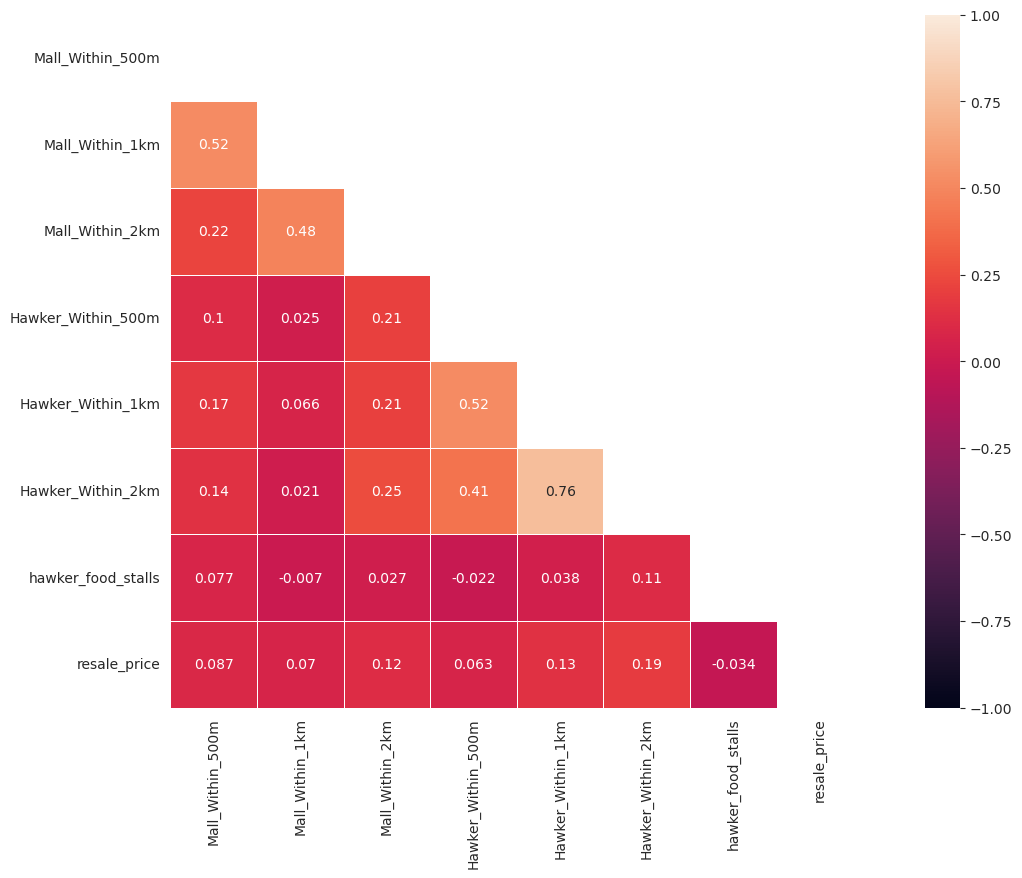

In [53]:
# Visualization heatmap of the correlation of the null columns relatve to resale price
# Establish size of figure.
plt.figure(figsize = (16,9))

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(house_null.corr())
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(house_null.corr(), mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5)

$\color{red}{\text{Null Values Analysis:}}$
 
As can be from the value_counts code above, there are:

- 829 missing values in Malls Nearest Distance column.
- 92789 missing values in Malls within 500m column.
- 25426 missing values in Malls within 1km column.
- 1940 missing values in Malls within 2km column.
- 97390 missing values in Hawker within 500m column.
- 60868 missing values in Hawker within 1km column.
- 29202 missing values in Hawker within 2km column.

As can be seen from the above correlation heatmap, the absolute values for the correlation coefficients of the variables are lesser than l. Hence, these features do not affect significantly on the resale price of the HDB flats, I will drop these 7 columns rather than dropping the rows with the null values.


### 2.2 Categorical Values 

There are 20 columns that are categorical features. 

The categorical features pertaining to the flat are:

*town* refers to the different HDB Residential towns that particular flat resides in.

*flat_type* refers the room type (1, 2, 3, 4, 5, Executive or Multi-Generation) of that particular flat.

*block* refers to the identity number of that particular block of flat.

*street_name* refers to the name of the street of that particular flat.

*storey_range* refers to where that particular flat's floor belong to.

*flat_model* refers to the model of that particular flat such as (simplified, standard, DBSS, etc.)( https://www.teoalida.com/singapore/hdbflattypes/)

*full_flat_type* refers to the combination of *flat_type* and *flat_model* of that particular flat.

*address* refers to the combination of *street_name* and *block* that particular flat.

*residential* refers to whether that particular flat has residential units in the same block.

*commercial* refers to whether that particular flat has commercial units in the same block.

*market_hawker* refers to whether that particular block of flats has a market/hawker entity.

*multistorey_carpark* refers to whether that particular flat has a multi-storey carpark to park their cars.

*precinct_pavilion* refers to whether that particular flat has a precinct pavilion for leisure activities.

*planning_area* refers to URA planning zones for various commercial/residential developments.

*mrt_name* refers to the name of the MRT station within the vicinity of that particular flat.

*bus_stop_name* refers to the name of the bus stop within the vicinity of that particular flat.

*pri_sch_name* refers to the name of the primary school that is within the vicinity of that particular flat.

*sec_sch_name* refers to the name of the secondary school that is within the vicinity of that particular flat.

### 2.3 Duplicates

In [54]:
# Checking for duplicated rows
print ('The duplicated rows for this housing train set is',house.duplicated().sum())

The duplicated rows for this housing train set is 0


$\color{red}{\text{Duplicates Analysis:}}$

From the code above, there are no duplicated rows.

### 2.4 Repeated Columns

There are repeated columns or columns that have similar attributes:-

1) Transaction Year and Month

2) Storey Levels

3) Floor Area

4) Town or Planning Area

5) Flat Type/Model

#### 2.4.1 Transactions Year & Month 

*Tranc_YearMonth* column is split into the *Tranc_Year* and *Tranc_Month* columns. I will retain the ***Tranc_Year*** column to do a visualization on the changes on the average HDB housing resale prices on yearly basis.

In [55]:
# Checking the average resale price on different flat types per year
price_on_year=house.groupby(['Tranc_Year', 'flat_type'])['resale_price'].mean().reset_index()
price_on_year.head(10)

Tranc_Year         flat_type   resale_price
0        2012            1 ROOM  233363.636364
1        2012            2 ROOM  270955.251613
2        2012            3 ROOM  353504.464871
3        2012            4 ROOM  458576.333994
4        2012            5 ROOM  546110.090739
5        2012         EXECUTIVE  630907.866848
6        2012  MULTI-GENERATION  757250.000000
7        2013            1 ROOM  240100.000000
8        2013            2 ROOM  275631.786164
9        2013            3 ROOM  361474.115513

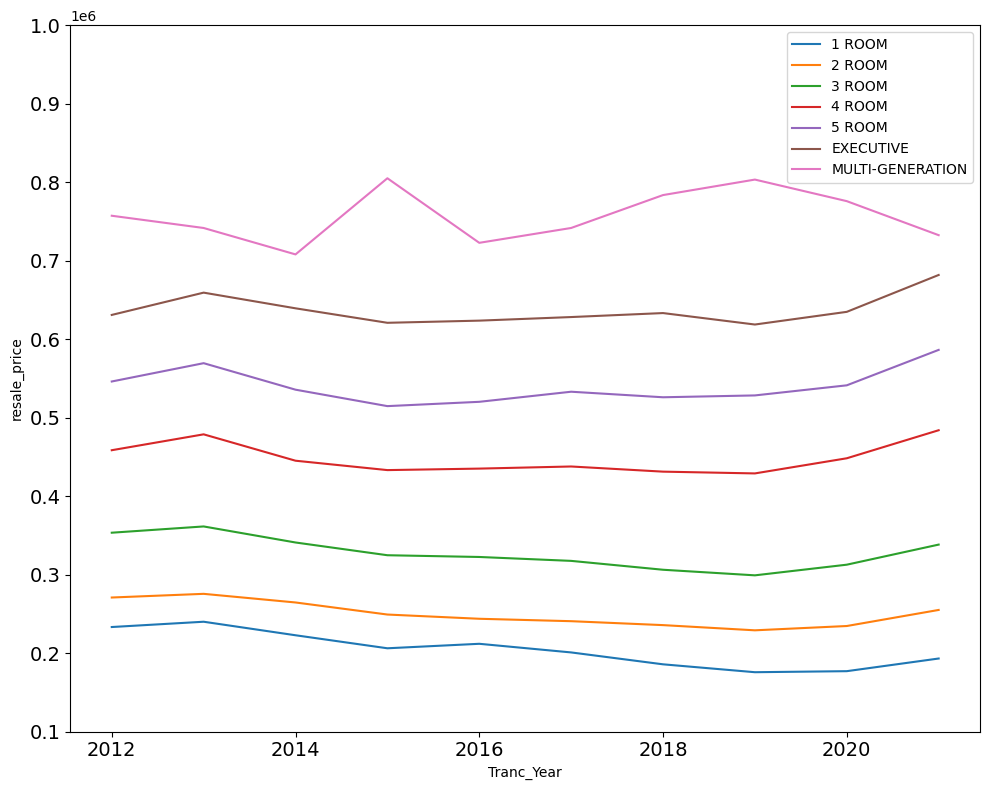

In [56]:
# Create lineplot of average housing prices year on year
plt.figure(figsize=(10,8))
sns.despine(left=False, right=False)

sns.lineplot(data=price_on_year,x='Tranc_Year',y='resale_price', hue='flat_type')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(100000,1000000)
plt.legend(loc='upper right')
plt.tight_layout()

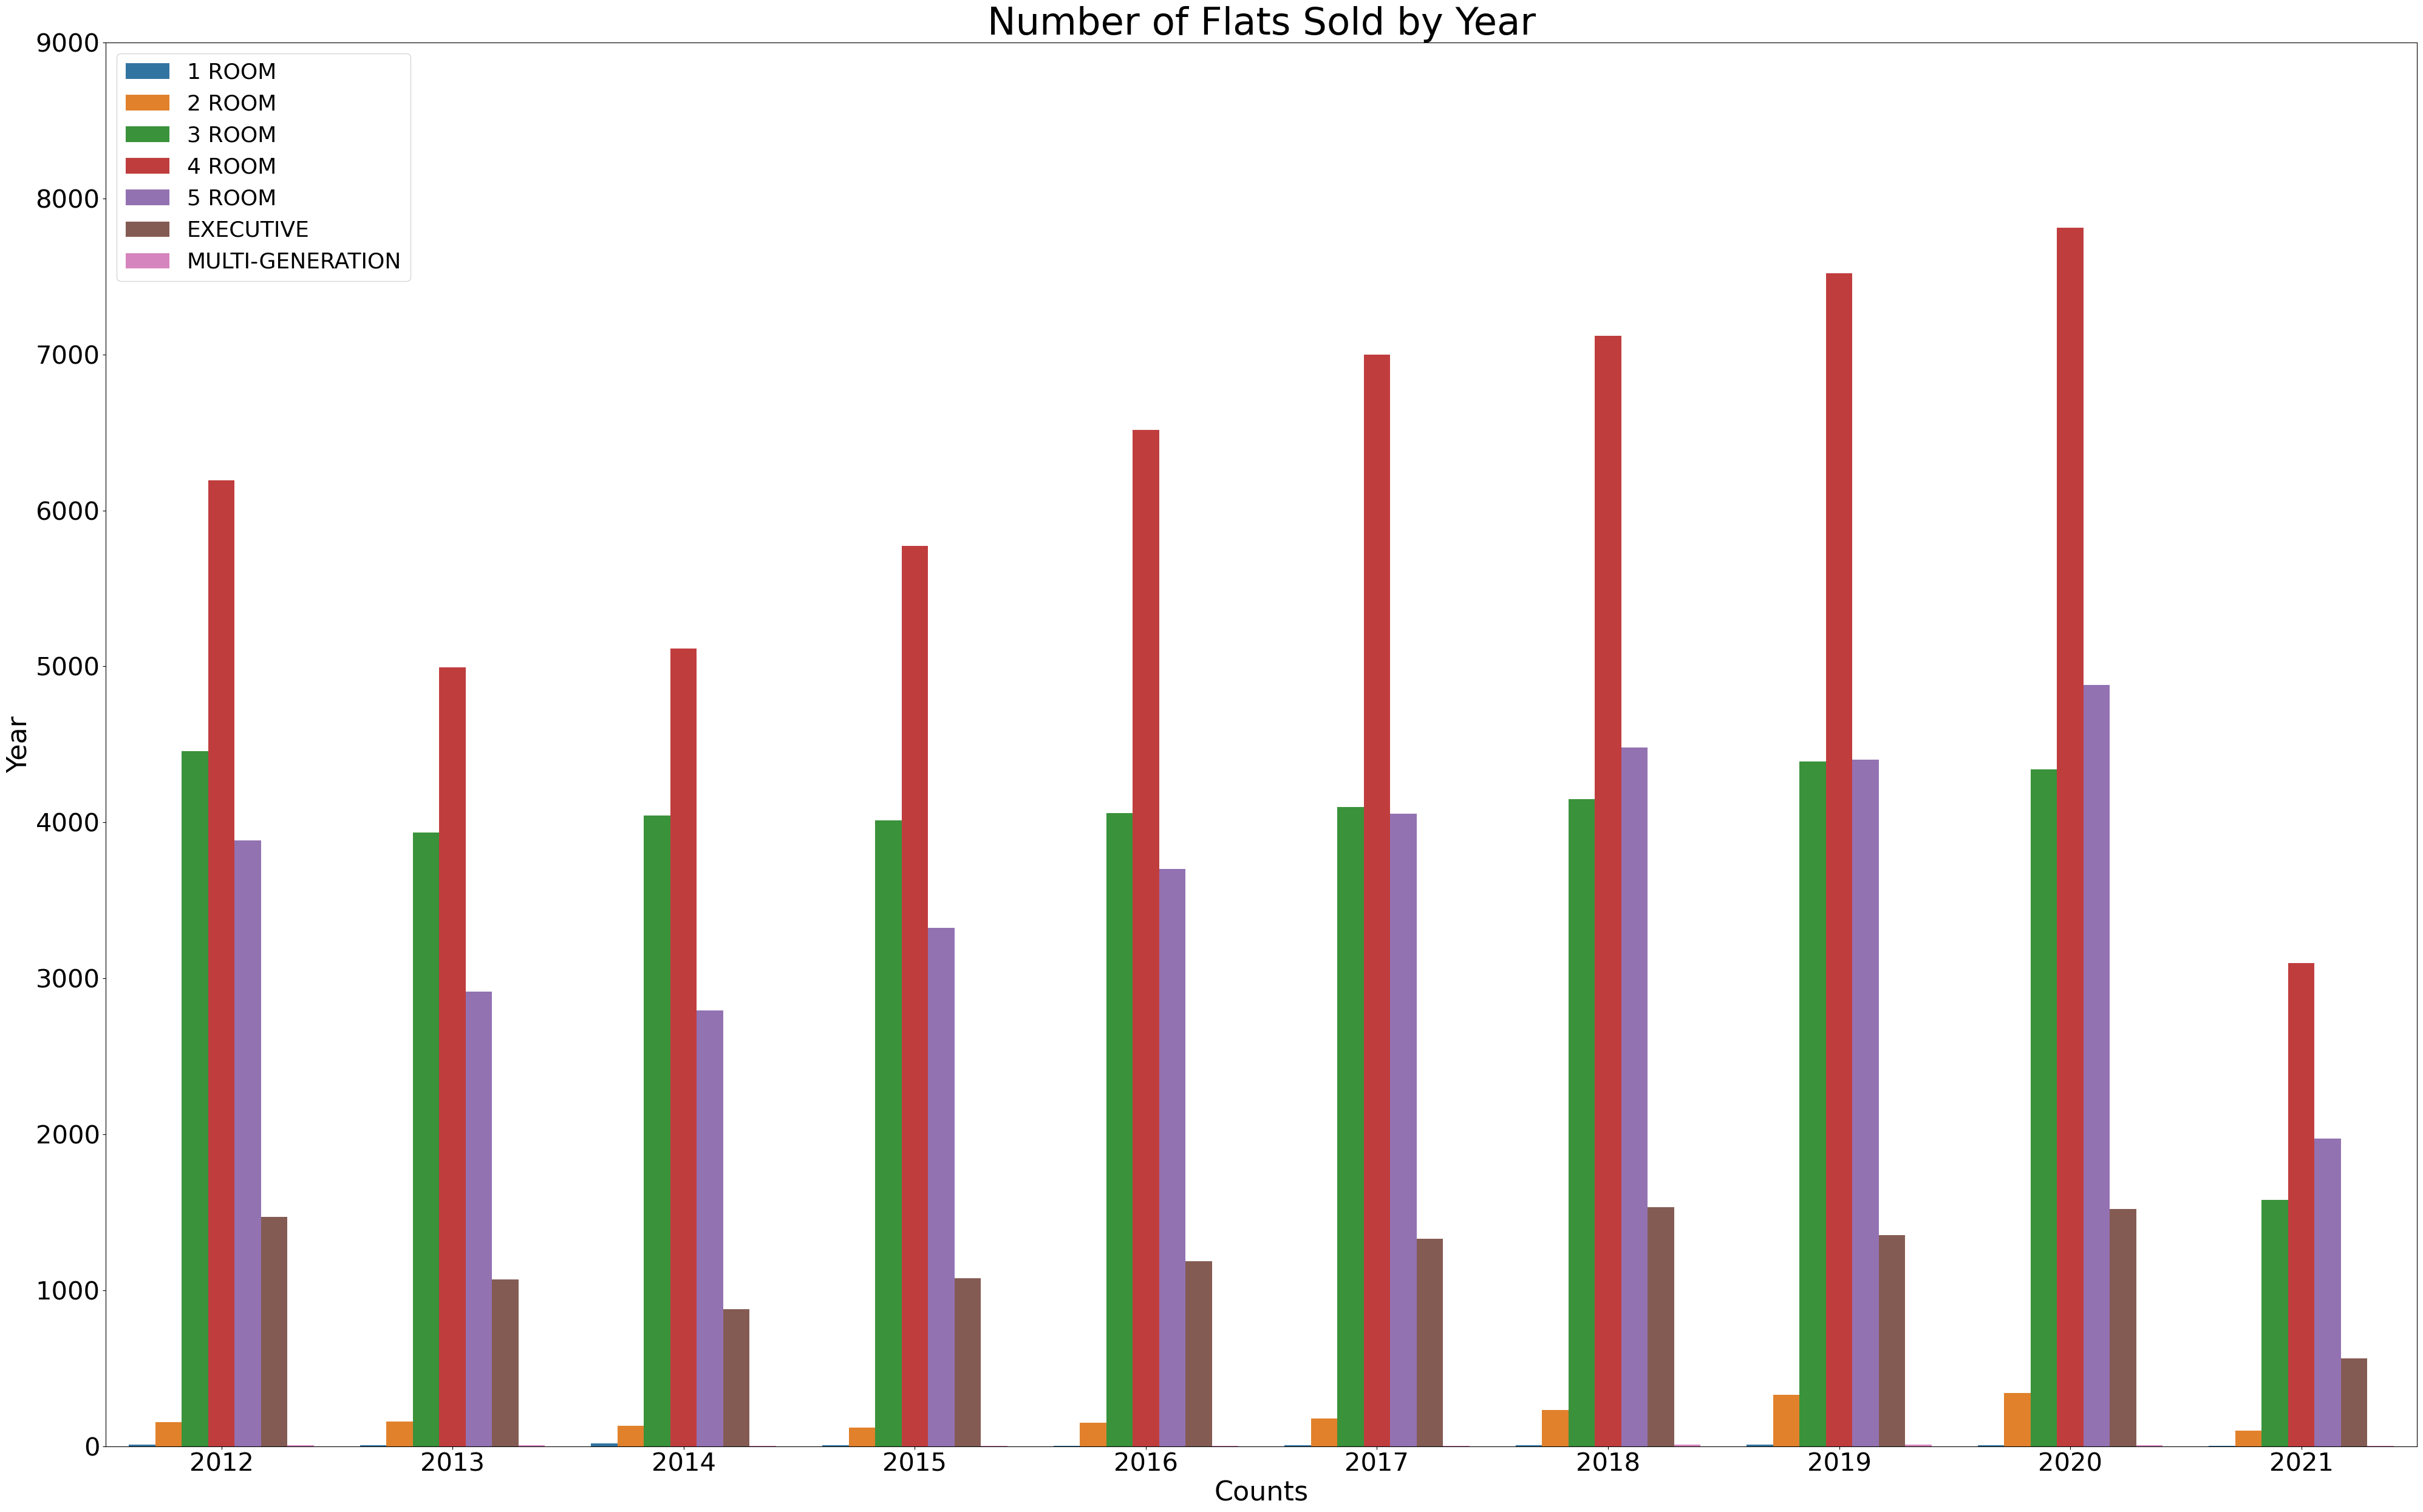

In [57]:
# Create a countplot of no. of flats sold per year
plt.figure(figsize=(40,25))
# setting hue_order
order=house['flat_type'].sort_values().unique()
# Creating the countplot
sns.countplot(data=house, x='Tranc_Year', hue='flat_type', hue_order=order)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel(xlabel='Counts', fontsize=32)
plt.ylabel(ylabel='Year', fontsize=32)
plt.title('Number of Flats Sold by Year', fontsize=45)
plt.ylim(0,9000)
plt.legend(loc='upper left', fontsize=26)
plt.tight_layout();

$\color{red}{\text{Transaction Year and Month Analysis:}}$

From the Average Hosung Resale PricelineplotOverall trend of flat prices has been very stable for the last 10 years. This is due to the cooling measures that have been implemented by the Singapore Goverment to control HDB housing resale prices (https://www.mas.gov.sg/news/media-releases/2013/additional-measures-to-ensure-a-stable-and-sustainable-property-marketon). But it is worth noting that HDB housing resale prices increase from 1 Room to Multi-Generation flats. Slight uptick from 2020 onwards. 

The countplot shows that there was a drop in 2013 for all flat types. This culd be due to the 3 cooling measure that was implemented back to back between Oct of 2012 to June 2013. But it can be seen there is steady increase in the number of flsts sold from Year 2014 onwards.

It is imperative to keep the ***Tranc_Year*** column so that we can keep track of any changes in the HDB housing resale prices in the future.

#### 2.4.2 Storey Levels

*storey_range*, *Median Floor*, *mid_storey*, *upper*, *lower* and *median* columns all represents the particular floor of the HDB that was bought. 

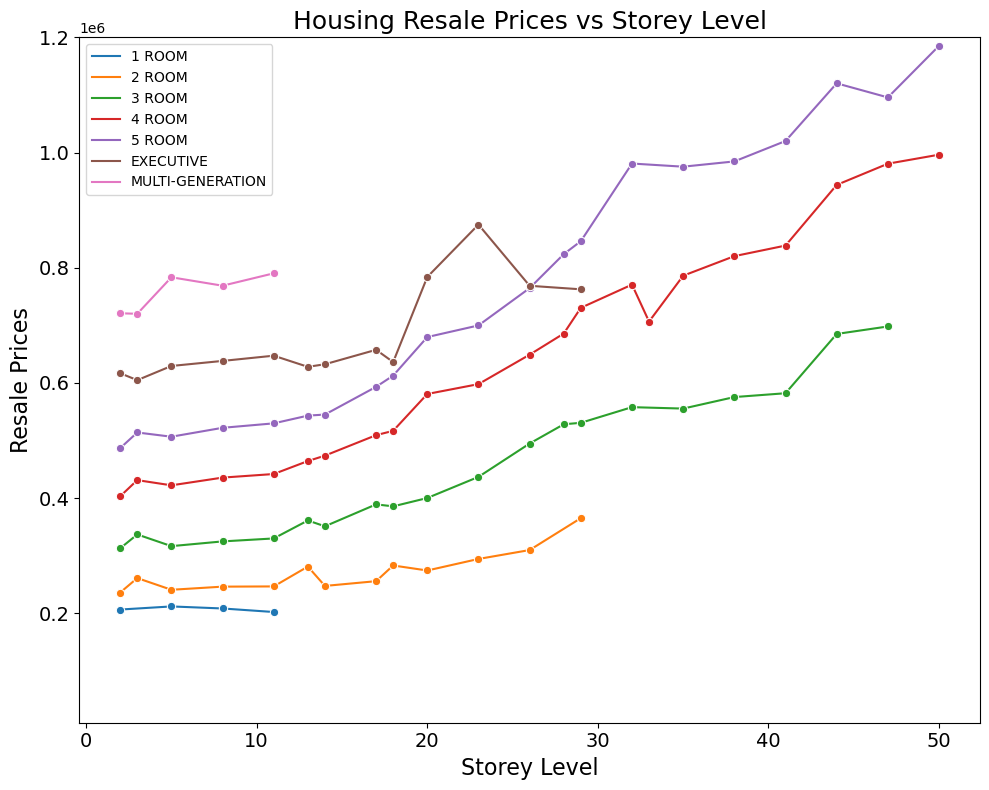

In [58]:
plt.figure(figsize=(10,8))
# setting hue_order
order=house['flat_type'].sort_values().unique()
# Create lineplot of resale prices against floor level
sns.lineplot(data=house,x='mid',y='resale_price', hue='flat_type', markers=True, marker='o', hue_order=order, ci=None)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(10000,1200000)
plt.xlabel(xlabel='Storey Level', fontsize=16)
plt.ylabel(ylabel='Resale Prices', fontsize=16)
plt.title('Housing Resale Prices vs Storey Level', fontsize=18)
plt.legend(loc='upper left')

plt.tight_layout()

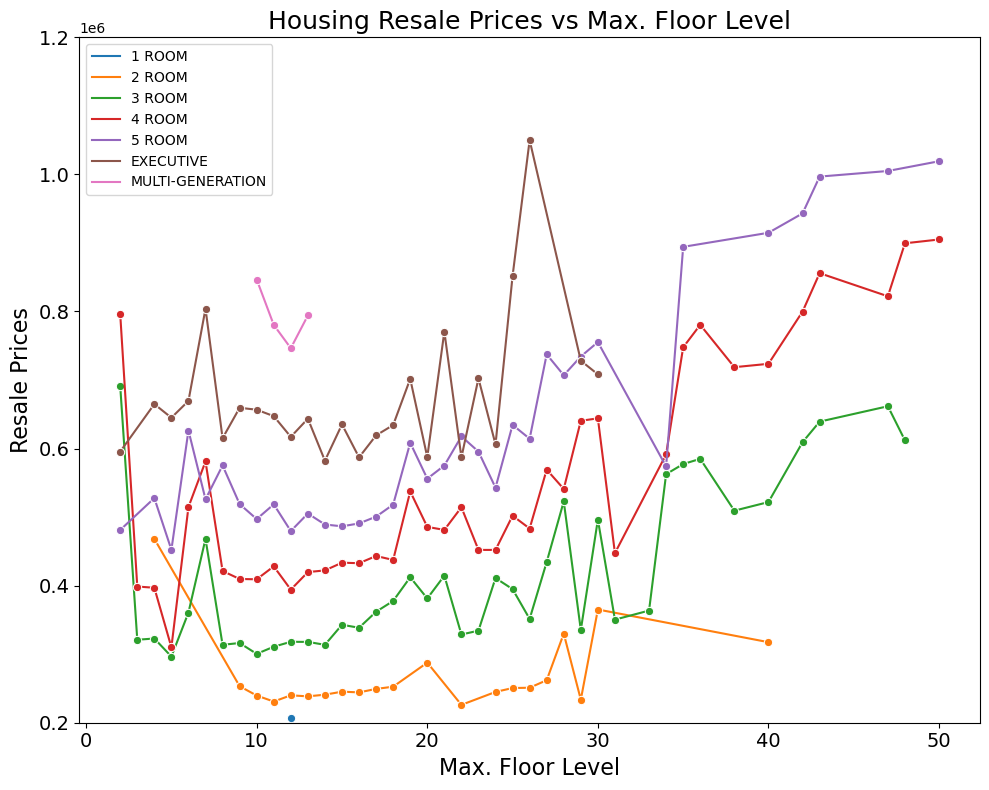

In [59]:
plt.figure(figsize=(10,8))
# setting hue_order
order=house['flat_type'].sort_values().unique()
# Create lineplot of resale prices against max floor level
sns.lineplot(data=house,x='max_floor_lvl',y='resale_price', hue='flat_type',markers=True, marker='o',hue_order=order, ci=None)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Housing Resale Prices vs Max. Floor Level', fontsize=18)
plt.xlabel(xlabel='Max. Floor Level', fontsize=16)
plt.ylabel(ylabel='Resale Prices', fontsize=16)
plt.ylim(200000,1200000)
plt.legend(loc='upper left')
plt.tight_layout()

$\color{red}{\text{Storey Level Analysis:}}$

From the Storey Level lineplot, it can be seen that the HDB housing resale prices increases with the storey level of the flat for all flat types.

From the Max. Floor Level lineplot, it can be seen that those block of flats that have max.floor level from 20 onwards, the HDB housing resale prices increase with increase in max. floor levels. This can be due to the fact that most of the high max. floor levels data points belong to newly reached MOP(Minimum Occupied Period) status flats that are sold on the market. But it can also be inferred from the same lineplot, that flats having lower Max. Floor Level (<10 Storeys) are also sold at hefy prices. This can be due to those Terrace Flats who highest floor is 2 and those older flats in the Central Area that doesnt have very high floors. And using the *mid* column which represents the floor level of the particular flat is sufficient enough to use for the predictive housing price modeling.

In both lineplots, there is not much data on both the 1 Room and Multi-Generation flats for the time period of analysis.

I will keep ***mid*** column and dropped the other columns pertaining to floors/storeys of the particular flat.

#### 2.4.3 Floor Area

*floor_area_sqm* and *floor_area_sqft* columns show the same floor area but in different  measurement units. I decided to use ***floor_area_sqm*** as the numerical values are smaller.

In [60]:
house['flat_type'].sort_values().unique()

array(['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE',
       'MULTI-GENERATION'], dtype=object)

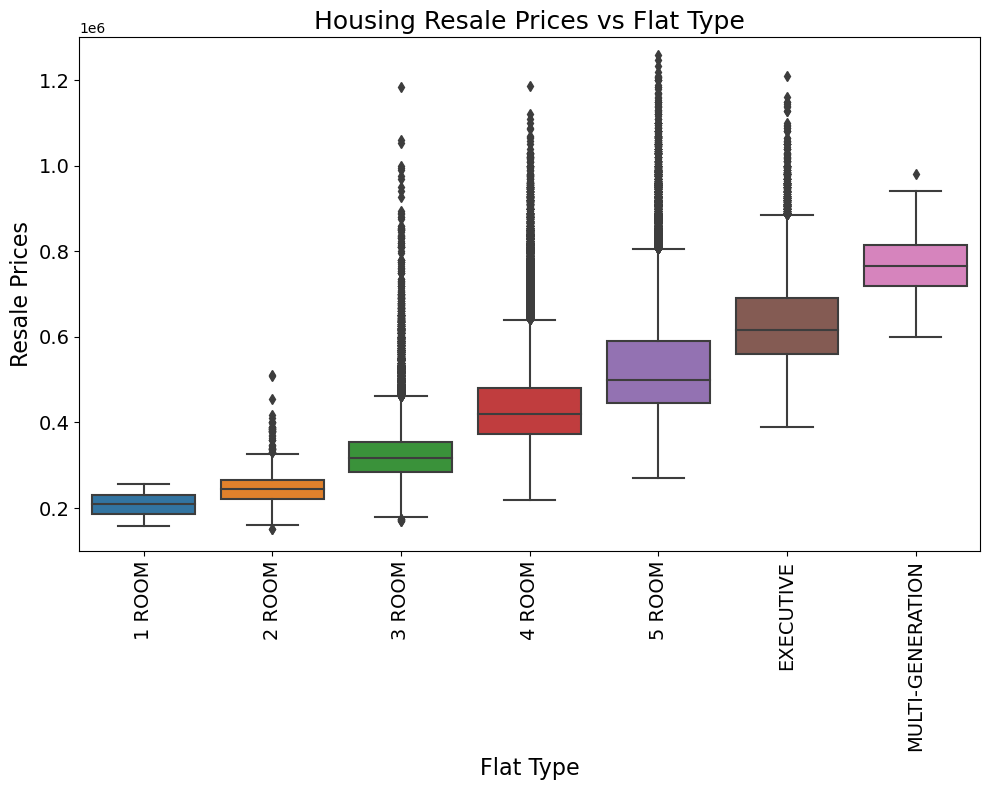

In [61]:
plt.figure(figsize=(10,8))
cat_order=house['flat_type'].sort_values().unique()
# Create the box plot
sns.boxplot(x='flat_type', y='resale_price', data=house, order=cat_order)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)
plt.title('Housing Resale Prices vs Flat Type', fontsize=18)
plt.xlabel(xlabel='Flat Type', fontsize=16)
plt.ylabel(ylabel='Resale Prices', fontsize=16)
plt.ylim(100000,1300000)
plt.tight_layout()

In [62]:
housegroup_sqm=house.groupby(['flat_type', 'flat_model'])['floor_area_sqm'].describe()
housegroup_sqm

count        mean        std  \
flat_type        flat_model                                               
1 ROOM           Improved                   82.0   31.000000   0.000000   
2 ROOM           2-room                      4.0   50.750000   4.924429   
                 DBSS                        1.0   50.000000        NaN   
                 Improved                  521.0   45.414587   3.265922   
                 Model A                   739.0   46.384303   1.934867   
                 Premium Apartment          37.0   51.783784   5.159323   
                 Standard                  594.0   44.949495   4.183499   
3 ROOM           DBSS                      184.0   65.755435   3.468826   
                 Improved                10240.0   65.205078   4.978176   
                 Model A                  8454.0   71.698722   4.313867   
                 New Generation          15227.0   69.851829   5.309458   
                 Premium Apartment         417.0   67.474820   1.419292   
                 Simplified               1930.0   64.374093   1.750643   
                 Standard                 2522.0   60.475535   6.765096   
                 Terrace                    86.0  108.883721  42.366307   
4 ROOM           Adjoined flat              27.0  116.666667  13.479329   
                 DBSS                      604.0   89.917219   4.318931   
                 Improved                 1847.0   85.173470   3.411730   
                 Model A                 35127.0   99.129985   6.886019   
                 Model A2                 2064.0   89.216085   3.940519   
                 New Generation           8139.0   93.158005   3.321749   
                 Premium Apartment        7667.0   94.773184   5.069058   
                 Premium Apartment Loft     36.0   97.944444   4.597791   
                 Simplified               5309.0   84.494632   1.784188   
                 Standard                   65.0   77.420000   7.436359   
                 Terrace                     9.0  114.555556  14.858593   
                 Type S1                   242.0   94.363636   1.225592   
5 ROOM           Adjoined flat             138.0  135.420290   8.726846   
                 DBSS                      869.0  111.895282   4.405886   
                 Improved                25824.0  117.802897   5.962587   
                 Improved-Maisonette        19.0  135.789474   4.263266   
                 Model A                  1941.0  134.405461   3.109837   
                 Model A-Maisonette        262.0  140.938931   4.283544   
                 Premium Apartment        5535.0  113.715808   4.876427   
                 Premium Apartment Loft     14.0  148.000000   1.037749   
                 Standard                 1686.0  118.915184   4.007180   
                 Type S2                   127.0  106.125984   0.899666   
EXECUTIVE        Adjoined flat              95.0  161.705263   7.969188   
                 Apartment                6080.0  143.732237  12.541913   
                 Maisonette               4364.0  147.900321   4.640494   
                 Premium Apartment        1435.0  133.197909   6.024230   
                 Premium Maisonette         15.0  160.466667  25.345799   
MULTI-GENERATION Multi Generation           56.0  161.250000  11.873959   

                                           min     25%    50%     75%    max  
flat_type        flat_model                                                   
1 ROOM           Improved                 31.0   31.00   31.0   31.00   31.0  
2 ROOM           2-room                   46.0   46.75   51.0   55.00   55.0  
                 DBSS                     50.0   50.00   50.0   50.00   50.0  
                 Improved                 40.0   44.00   45.0   45.00   57.0  
                 Model A                  37.0   46.00   47.0   47.00   50.0  
                 Premium Apartment        46.0   48.00   52.0   56.00   60.0  
                 Standard          

In [63]:
# Checking the average resale price on different flat types per year
house_price_on_sqm=house.groupby(['floor_area_sqm', 'flat_type'])['resale_price'].mean()
house_price_on_sqm.tail(10)

floor_area_sqm  flat_type
189.0           EXECUTIVE    7.738671e+05
190.0           EXECUTIVE    7.983333e+05
192.0           EXECUTIVE    7.639556e+05
199.0           EXECUTIVE    9.050000e+05
215.0           3 ROOM       8.300000e+05
                EXECUTIVE    8.940000e+05
237.0           3 ROOM       1.185000e+06
243.0           EXECUTIVE    1.092888e+06
249.0           3 ROOM       1.021388e+06
280.0           3 ROOM       1.060000e+06
Name: resale_price, dtype: float64

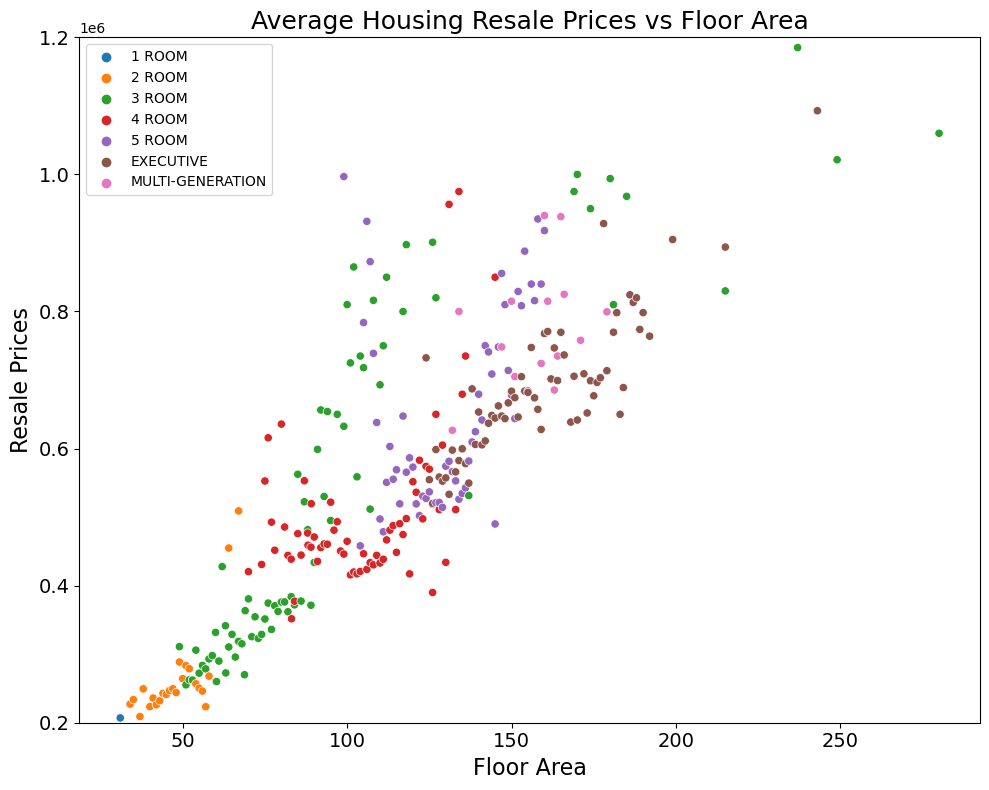

In [64]:
plt.figure(figsize=(10,8))
# setting hue_order
order=house['flat_type'].sort_values().unique()
# Create scatterplot of ave. resale prices against floor area
sns.scatterplot(data=house_price_on_sqm.reset_index(),x='floor_area_sqm',y='resale_price', hue='flat_type', hue_order=order)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Average Housing Resale Prices vs Floor Area', fontsize=18)
plt.xlabel(xlabel='Floor Area', fontsize=16)
plt.ylabel(ylabel='Resale Prices', fontsize=16)
plt.ylim(200000,1200000)
plt.legend(loc='upper left')
plt.tight_layout()

$\color{red}{\text{Floor Area Analysis:}}$

The above summary statistics show the an overview of the floor area by Flat and Model types. Generally, you can see the floor area increase from 1 Room to Mutli-Generation flats.The diiference in the Flat Model can be explained by HDB variations of model types built in different years / periods (1960s - 2020) differs in the actual floor area of the flats https://www.teoalida.com/singapore/hdbflatsizes/).

From the summary statistics, the average floor area:

- 1 Room (31sqm)
- 2 Room (45 to 52sqm)
- 3 Room (60 to 109sqm) The larger floor area belongs to the Terrace flat model.
- 4 Room (77 to 117sqm) The larger floor area belongs to the Terrace and Adjoined flat model.
- 5 Room (106 to 148sqm) The larger floor area belongs to the Premium Apartment Loft that comes with small garden balcony.
- Executive (133 to 162sqm) The larger floor area belongs to the Adjoined flat model.
- Multi-Generation (161sqm)

*Note* There is one data point of 2 ROOM DBSS which will be removed for later predictive modeling.

The Floor Area scatterplot shows the HDB housing resale prines increase as floor area increases for all flat types.


#### 2.4.4 Town or Planning Area

*town* column is HDB way of defining residential towns, whereas *planning_area* column is URA zoning for different areas of Singapore. For this project, I will use ***town*** column.

   ![Singapore HDB Map](https://services2.hdb.gov.sg/webapp/BB33RESLSTATUS/images/Singapore_Map.jpg)Source:HDB

The Singapore HDB map above shows the different HDB zones:

- Central
- West
- East
- North-East
- North
_________________________________________________

Each zones contain several towns:

Central:

- Bishan
- Bukit Merah
- Bukit Timah
- Central Area
- Geylang
- Kallang/ Whampoa
- Marine Parade
- Queenstown
- Toa Payoh

West:

- Bukit Batok
- Bukit Panjang
- Choa Chu Kang
- Clementi
- Jurong East
- Jurong West

North:

- Sembawang
- Woodlands
- Yishun

North-East:

- Ang Mo Kio
- Hougang
- Punggol
- Sengkang
- Serangoon

East:

- Bedok
- Pasir Ris
- Tampines

#### Central Zone

In [65]:
# creating a datafram for all towns in central zone
central=house.loc[(house['town']=='BISHAN')|(house['town']=='BUKIT MERAH')|(house['town']=='BUKIT TIMAH')
                  |(house['town']=='CENTRAL AREA')|(house['town']=='GEYLANG')|(house['town']=='KALLANG/WHAMPOA')
                  |(house['town']=='MARINE PARADE')|(house['town']=='MARINE PARADE')|(house['town']=='QUEENSTOWN')|(house['town']=='TOA PAYOH')]

In [66]:
# Checking the average resale price on different flat types per central town
house_price_grp_central=central.groupby(['town', 'flat_type'])['resale_price'].mean().round()

# Creates a dataframe central zone house resale price
central_price=pd.DataFrame(house_price_grp_central)
central_price

resale_price
town            flat_type                     
BISHAN          3 ROOM                365179.0
                4 ROOM                550054.0
                5 ROOM                748421.0
                EXECUTIVE             885512.0
                MULTI-GENERATION      880000.0
BUKIT MERAH     1 ROOM                207015.0
                2 ROOM                263451.0
                3 ROOM                389032.0
                4 ROOM                645159.0
                5 ROOM                766499.0
BUKIT TIMAH     3 ROOM                415921.0
                4 ROOM                629277.0
                5 ROOM                815721.0
                EXECUTIVE             950414.0
CENTRAL AREA    2 ROOM                268732.0
                3 ROOM                425633.0
                4 ROOM                731434.0
                5 ROOM                930111.0
GEYLANG         2 ROOM                225405.0
                3 ROOM                305497.0
                4 ROOM                513589.0
                5 ROOM                678429.0
                EXECUTIVE             734457.0
KALLANG/WHAMPOA 2 ROOM                249084.0
                3 ROOM                354739.0
                4 ROOM                554815.0
                5 ROOM                722382.0
                EXECUTIVE             781149.0
MARINE PARADE   2 ROOM                260200.0
                3 ROOM                400253.0
                4 ROOM                523294.0
                5 ROOM                809381.0
QUEENSTOWN      2 ROOM                259377.0
                3 ROOM                382650.0
                4 ROOM                698598.0
                5 ROOM                843100.0
                EXECUTIVE             982720.0
TOA PAYOH       2 ROOM                232557.0
                3 ROOM                313113.0
                4 ROOM                564466.0
                5 ROOM                753534.0
                EXECUTIVE             801196.0

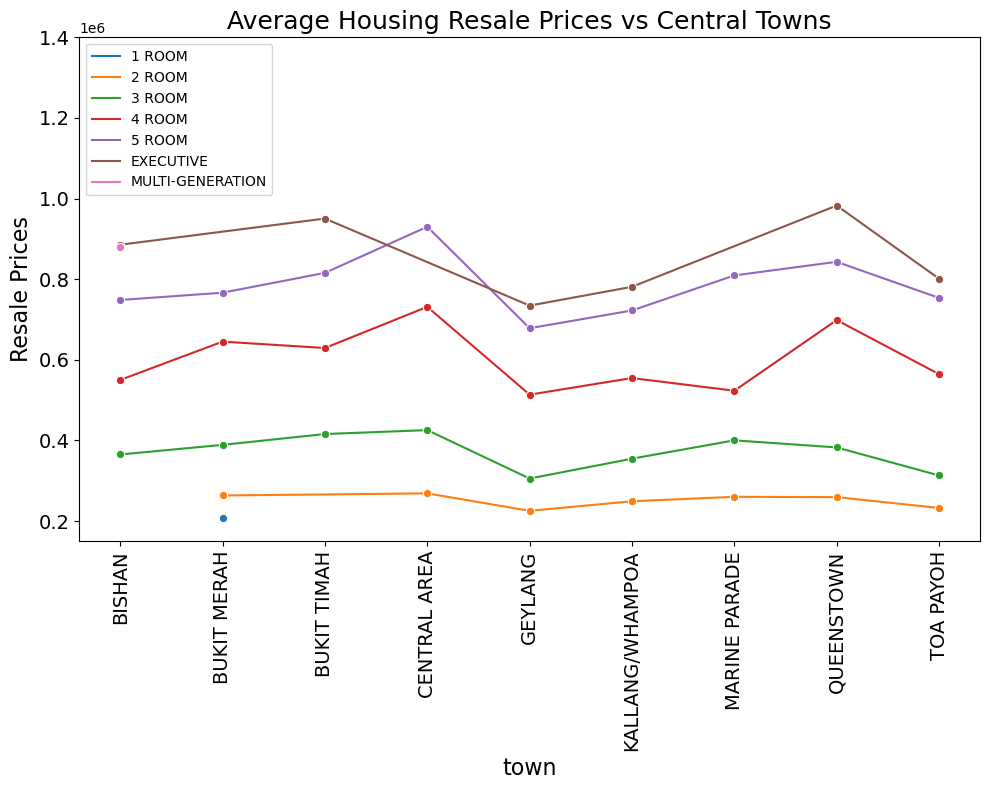

In [67]:
plt.figure(figsize=(10,8))
# Setting hue_order
order=house['flat_type'].sort_values().unique()
# Create lineplot of average resale prices against central towns
sns.lineplot(data=central_price,x='town',y='resale_price', hue='flat_type', hue_order=order, markers=True, marker='o')
plt.xticks(rotation =90,fontsize=14)
plt.yticks(fontsize=14)
plt.title('Average Housing Resale Prices vs Central Towns', fontsize=18)
plt.xlabel(xlabel='town', fontsize=16)
plt.ylabel(ylabel='Resale Prices', fontsize=16)
plt.ylim(150000,1400000)
plt.legend(loc='upper left')
plt.tight_layout()

$\color{red}{\text{Central Zone Analysis:}}$

There is only 1 data point on 1 Room which belongs to Bukit Merah, not much inference can be done.

For the 2 Room, the average HDB housing resale prices seems to be constant throughout all the Central towns, with Geylang being the lowest at 225405 dollars and the highest in Central Area at 268732 dollars.

For the 3 Room, the average HDB housing resale prices do not vary much across the Central towns with the lowest in Geylang at 305497 dollars and the highest in Central Area at 425633 dollars.

For the 4 Room, there are 4 towns (Bukit Merah, Bukit Timah, Central Area and Queenstown) with average HDB housing resale prices above 600k dollars, with the lowest is in Geylang at 513589 dollars and the highest is in Central Area at 731434 dollars.

For the 5 Room, the trend seems to follow that of its 4 Room counterparts except for Marine Parade and Bukit Timah, with the avaerage HDB housing resale price lowest in Geylang at 678429 dollars and the highest in Central Area at 930111 dollars.

There is no Executive data in Central Area. For the Executive, the average HDB housing resale prices is the lowest in Geylang at 733457 dollars and the highest in Queenstown at 982720 dollars.

**In the Central Zone, Geylang is the cheapest town for all flat types, Central is the most expensive for all flat types except Executive, and Queenstown is the most expensive for Executive.**

#### West Zone

In [68]:
# creating a datafram for all towns in west zone
west=house.loc[(house['town']=='BUKIT BATOK')|(house['town']=='BUKIT PANJANG')|(house['town']=='CHOA CHU KANG')
                  |(house['town']=='CLEMENTI')|(house['town']=='JURONG EAST')|(house['town']=='JURONG WEST')]

In [69]:
# Checking the average resale price on different flat types per west town 
house_price_grp_west=west.groupby(['town', 'flat_type'])['resale_price'].mean().round()

# Creates a dataframe west zone house resale price
west_price=pd.DataFrame(house_price_grp_west)
west_price

resale_price
town          flat_type              
BUKIT BATOK   3 ROOM         289907.0
              4 ROOM         401074.0
              5 ROOM         541841.0
              EXECUTIVE      635521.0
BUKIT PANJANG 2 ROOM         235920.0
              3 ROOM         306904.0
              4 ROOM         397619.0
              5 ROOM         493704.0
              EXECUTIVE      597939.0
CHOA CHU KANG 2 ROOM         236233.0
              3 ROOM         298507.0
              4 ROOM         374584.0
              5 ROOM         444369.0
              EXECUTIVE      556242.0
CLEMENTI      2 ROOM         295143.0
              3 ROOM         348169.0
              4 ROOM         547137.0
              5 ROOM         719607.0
              EXECUTIVE      826257.0
JURONG EAST   2 ROOM         239868.0
              3 ROOM         308577.0
              4 ROOM         419843.0
              5 ROOM         536012.0
              EXECUTIVE      676953.0
JURONG WEST   2 ROOM         232456.0
              3 ROOM         287973.0
              4 ROOM         390236.0
              5 ROOM         464877.0
              EXECUTIVE      564594.0

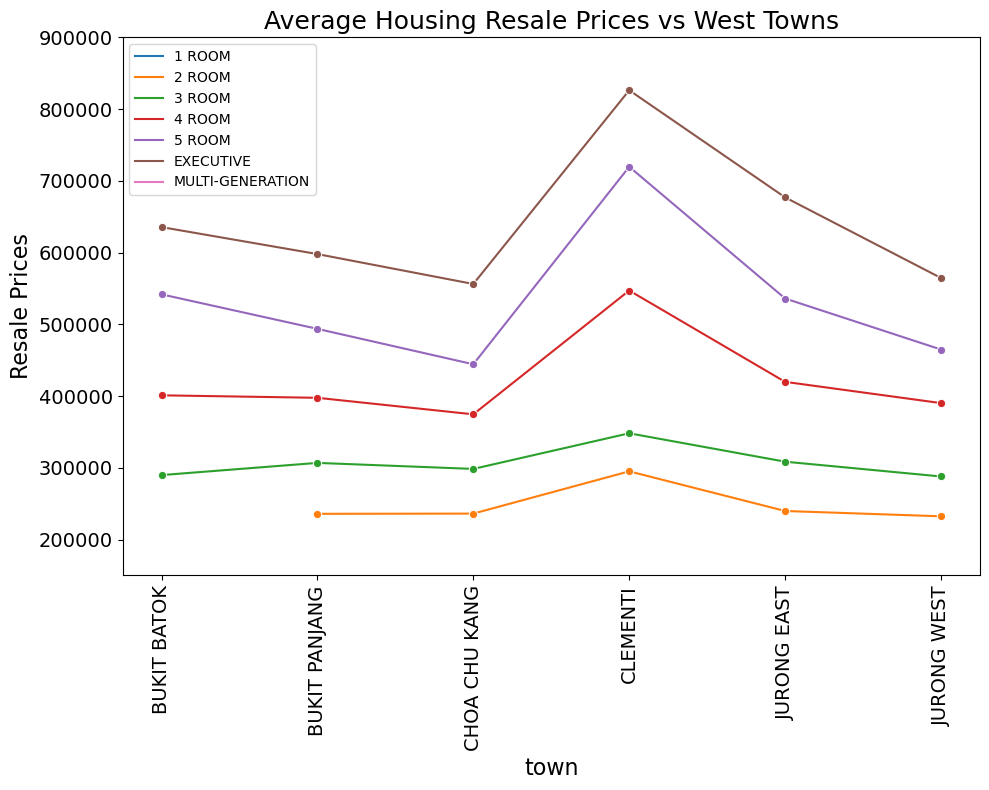

In [70]:
plt.figure(figsize=(10,8))
# Setting hue_order
order=house['flat_type'].sort_values().unique()
# Create lineplot of average resale prices against west towns
sns.lineplot(data=west_price,x='town',y='resale_price', hue='flat_type', hue_order=order, markers=True, marker='o')
plt.xticks(rotation =90,fontsize=14)
plt.yticks(fontsize=14)
plt.title('Average Housing Resale Prices vs West Towns', fontsize=18)
plt.xlabel(xlabel='town', fontsize=16)
plt.ylabel(ylabel='Resale Prices', fontsize=16)
plt.ylim(150000,900000)
plt.legend(loc='upper left')
plt.tight_layout()

$\color{red}{\text{West Zone Analysis:}}$

There is no data on 1 Room for inference in West Zone for the time period of analysis.

There is no 2 Room data in Bukit Batok. For the 2 Room average HDB housing resale prices, the lowest is in Jurong West at 232456 dollars and the highest is in Clementi at 295143 dollars. For the 2 Room in all west towns except Clementi, the average HDB housing resale prices ranges from 232456 to 239868 dollars.

For the 3 Room, the average HDB housing resale prices do not vary much across the West towns with the lowest in Jurong West at 287973 dollars and the highest in Clementi at 348169 dollars.

For the 4 Room, there is 1 town (Clementi) with average HDB housing resale prices above 500k dollars, with the lowest in Choa Chu Kang at 374584 dollars and the highest in Clementi at 547137 dollars.

For the 5 Room, the trend seems to follow that of its 4 Room counterparts except for Bukit Batok whose HDB average housing price is higher than Jurong West, with the lowest in Chao Chu Kang at 444369 dollars and the highest in Clementi at 719607 dollars.

For the Executive, the average HDB housing resale prices is lowest in Choa Chu Kang at 556242 dollars and the highest in Clementi at 826257 dollars.

There is no Multi-Generation data in the West Zone.

**In the West Zone, Clementi is the most expensive town for all flat types, Jurong West is the cheapest for all 2 Room and 3 Room flat types, and Choa Chu Kang is the cheapest for 4 Room, 5 Room and Executive.**

#### North Zone

In [71]:
# creating a datafram for all towns in north zone
north=house.loc[(house['town']=='WOODLANDS')|(house['town']=='SEMBAWANG')|(house['town']=='YISHUN')]

In [72]:
# Checking the average resale price on different flat types per north town 
house_price_grp_north=north.groupby(['town', 'flat_type'])['resale_price'].mean().round()

# Creates a dataframe north zone house resale price
north_price=pd.DataFrame(house_price_grp_north)
north_price

resale_price
town      flat_type                     
SEMBAWANG 2 ROOM                225590.0
          3 ROOM                298547.0
          4 ROOM                371232.0
          5 ROOM                428959.0
          EXECUTIVE             508836.0
WOODLANDS 2 ROOM                224566.0
          3 ROOM                284238.0
          4 ROOM                364772.0
          5 ROOM                433516.0
          EXECUTIVE             609168.0
YISHUN    2 ROOM                223981.0
          3 ROOM                297039.0
          4 ROOM                372462.0
          5 ROOM                480336.0
          EXECUTIVE             593488.0
          MULTI-GENERATION      740616.0

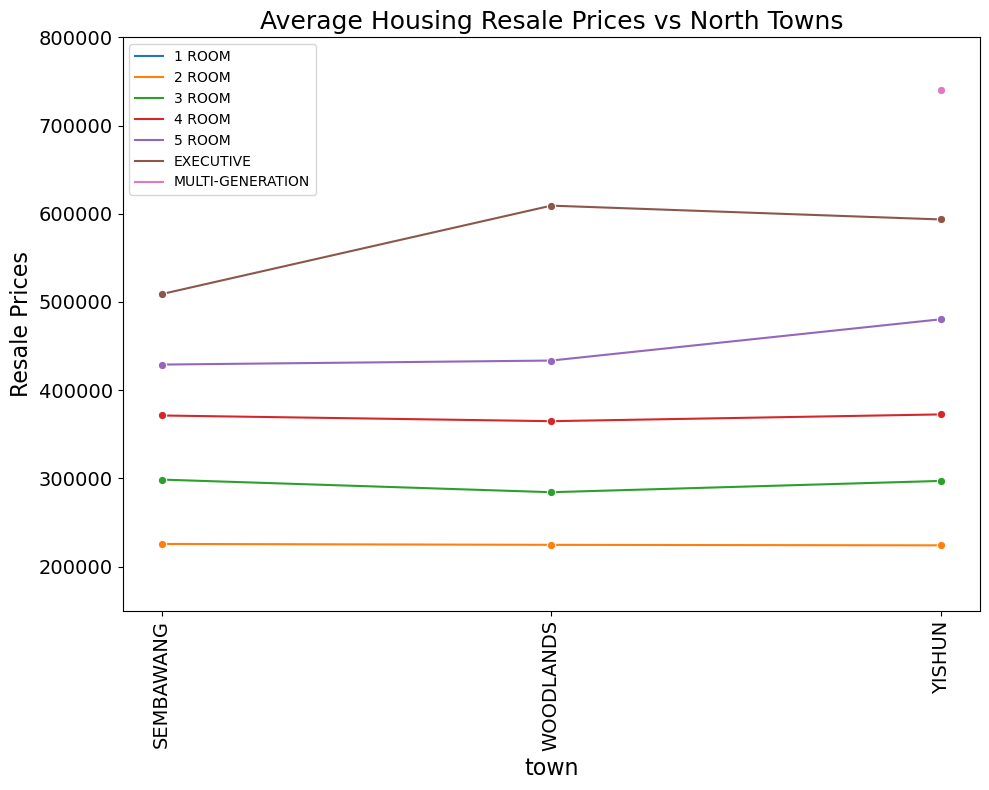

In [73]:
plt.figure(figsize=(10,8))
# Setting hue_order
order=house['flat_type'].sort_values().unique()
# Create lineplot of average resale prices against north towns
sns.lineplot(data=north_price,x='town',y='resale_price', hue='flat_type', hue_order=order, markers=True, marker='o')
plt.xticks(rotation =90,fontsize=14)
plt.yticks(fontsize=14)
plt.title('Average Housing Resale Prices vs North Towns', fontsize=18)
plt.xlabel(xlabel='town', fontsize=16)
plt.ylabel(ylabel='Resale Prices', fontsize=16)
plt.ylim(150000,800000)
plt.legend(loc='upper left')
plt.tight_layout()

$\color{red}{\text{North Zone Analysis:}}$

There is no data on 1 Room for inference in North Zone for the time period of analysis.

For the 2 Room, the average HDB housing resale prices seems to be contant throughout all the North towns, with the lowest in Yishun at 223981 dollars and the highest is in Sembawang at 225590 dollars. For the 2 Room in all north towns, the average HDB housing resale prices ranges from 223981 to 225590 dollars, about 1.6k dollars difference.

For the 3 Room, the average HDB housing resale prices do not vary much across the North towns with the lowest in Woodlands at 284238 dollars and the highest in Sembawang at 298547 dollars.

For the 4 Room, the average HDB housing resale prices do not vary much across the North towns with the lowest in Woodlands at 364772 dollars and the highest in Sembawang at 371232 dollars.

For the 5 Room, the average HDB housing resale price for Yishun is noticeably higher than the other 2 towns with the lowest in Woodlands at 433516 dollars and the highest in Yishun at 480336 dollars.

For the Executive, the average HDB housing resale prices is lowest in Sembawang at 508836 dollars and the highest in Woodlands at 609168 dollars.

There is only 1 data point on Multi-Generation which belongs to Yishun, not much inference can be done.

**In the North Zone, Sembawang is the most expensive town for 2 Room, 3 Room and 4 Room but the cheapest town for Executive. Yishun is the most expensive for 5 Room but the cheapest town for 2 Room. Woodlands is the most expensive town for Executive, but the cheapest town for 3 Room, 4 Room and 5 Room.**

#### North-East Zone

In [74]:
# creating a datafram for all towns in north-east zone
neast=house.loc[(house['town']=='ANG MO KIO')|(house['town']=='HOUGANG')|(house['town']=='PUNGGOL')|
                (house['town']=='SENGKANG')|(house['town']=='SERANGOON') ]

In [75]:
# Checking the average resale price on different flat types per north-east town 
house_price_grp_neast=neast.groupby(['town', 'flat_type'])['resale_price'].mean().round()

# Creates a dataframe north-east zone house resale price
neast_price=pd.DataFrame(house_price_grp_neast)
neast_price

resale_price
town       flat_type              
ANG MO KIO 2 ROOM         241879.0
           3 ROOM         323939.0
           4 ROOM         478951.0
           5 ROOM         672460.0
           EXECUTIVE      811221.0
HOUGANG    2 ROOM         240600.0
           3 ROOM         309326.0
           4 ROOM         409664.0
           5 ROOM         527441.0
           EXECUTIVE      674708.0
PUNGGOL    2 ROOM         255775.0
           3 ROOM         360391.0
           4 ROOM         458140.0
           5 ROOM         504146.0
           EXECUTIVE      570895.0
SENGKANG   2 ROOM         252307.0
           3 ROOM         349018.0
           4 ROOM         435607.0
           5 ROOM         483101.0
           EXECUTIVE      580221.0
SERANGOON  2 ROOM         239250.0
           3 ROOM         332755.0
           4 ROOM         466191.0
           5 ROOM         572011.0
           EXECUTIVE      735255.0

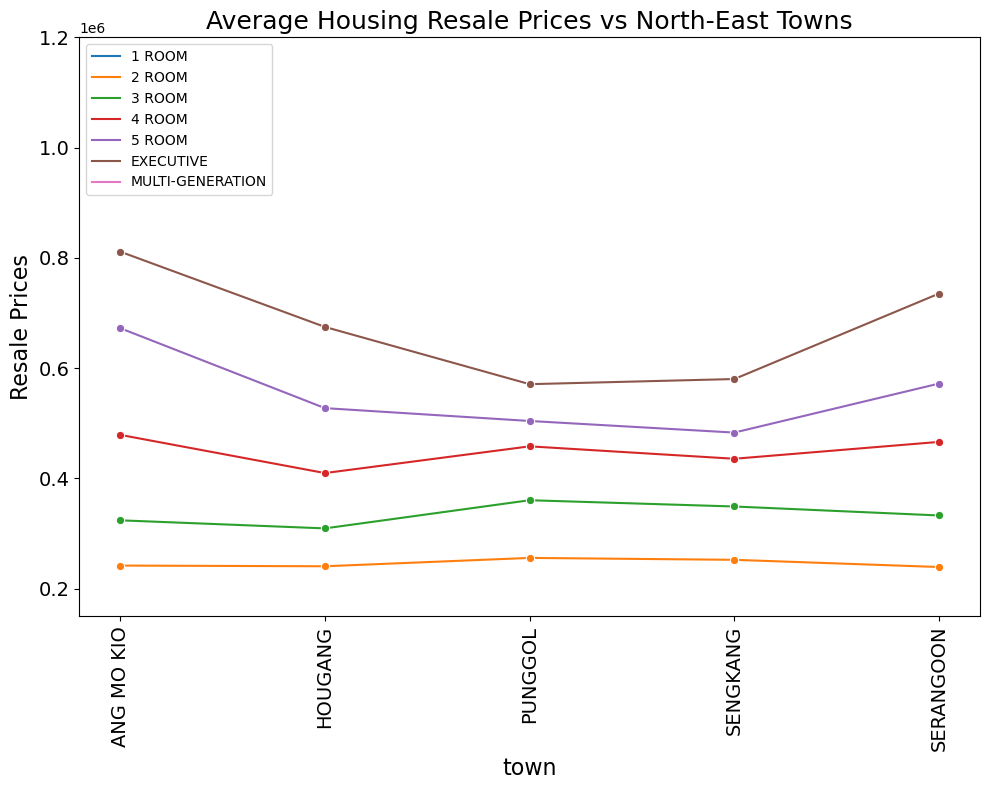

In [76]:
plt.figure(figsize=(10,8))
# Setting hue_order
order=house['flat_type'].sort_values().unique()
# Create lineplot of average resale prices against north-east towns
sns.lineplot(data=neast_price,x='town',y='resale_price', hue='flat_type', hue_order=order, markers=True, marker='o')
plt.xticks(rotation =90,fontsize=14)
plt.yticks(fontsize=14)
plt.title('Average Housing Resale Prices vs North-East Towns', fontsize=18)
plt.xlabel(xlabel='town', fontsize=16)
plt.ylabel(ylabel='Resale Prices', fontsize=16)
plt.ylim(150000,1200000)
plt.legend(loc='upper left')
plt.tight_layout()

$\color{red}{\text{North-East Zone Analysis:}}$

There is no data on 1 Room for inference in North-East Zone for the time period of analysis.

For the 2 Room, the average HDB housing resale prices seems to be contant throughout all the North-East towns, with the lowest in Serangoon at 239250 dollars and the highest is in Punggol at 255775 dollars. For the 2 Room in all north-east towns, the average HDB housing resale prices ranges from 239250 to 255775 dollars.

For the 3 Room, the average HDB housing resale prices do not vary much across the North-East towns with the lowest in Hougang at 309326 dollars and the highest in Punggol at 360391 dollars.

For the 4 Room, the average HDB housing resale prices is lowest in Hougang at 409664 dollars and the highest in Ang Mo Kio at 478951 dollars.

For the 5 Room, the average HDB housing resale price for Ang Mo Kio is noticeably higher than the other 4 towns with the lowest in Sengkang at 483101 dollars and the highest in Ang Mo Kio at 672460 dollars.

For the Executive, the average HDB housing resale prices is lowest in Punggol at 570895 dollars and the highest in Ang Mo Kio at 811221 dollars.

There is only 1 data point on Multi-Generation which belongs to Yishun, not much inference can be done.

**In the North-East Zone, Punggol is the most expensive town for 2 Room and 3 Room but the cheapest town for Executive. Ang Mo Kio is the most expensive town for 4 Room, 5 Room and Executive. Serangoon is the cheapest town for 2 Room. Hougang is the cheapest town for 3 Room and 4 Room. Sengkang is the cheapest town for 5 Room.**

#### East Zone

In [77]:
# creating a datafram for all towns in east zone
east=house.loc[(house['town']=='BEDOK')|(house['town']=='PASIR RIS')|(house['town']=='TAMPINES')]

In [78]:
# Checking the average resale price on different flat types per east town 
house_price_grp_east=east.groupby(['town', 'flat_type'])['resale_price'].mean().round()

# Creates a dataframe east zone house resale price
east_price=pd.DataFrame(house_price_grp_east)
east_price

resale_price
town      flat_type                     
BEDOK     2 ROOM                240144.0
          3 ROOM                314469.0
          4 ROOM                444494.0
          5 ROOM                581996.0
          EXECUTIVE             711731.0
PASIR RIS 2 ROOM                261889.0
          3 ROOM                351668.0
          4 ROOM                429869.0
          5 ROOM                501285.0
          EXECUTIVE             629323.0
TAMPINES  2 ROOM                265383.0
          3 ROOM                343804.0
          4 ROOM                447486.0
          5 ROOM                552715.0
          EXECUTIVE             680004.0
          MULTI-GENERATION      780429.0

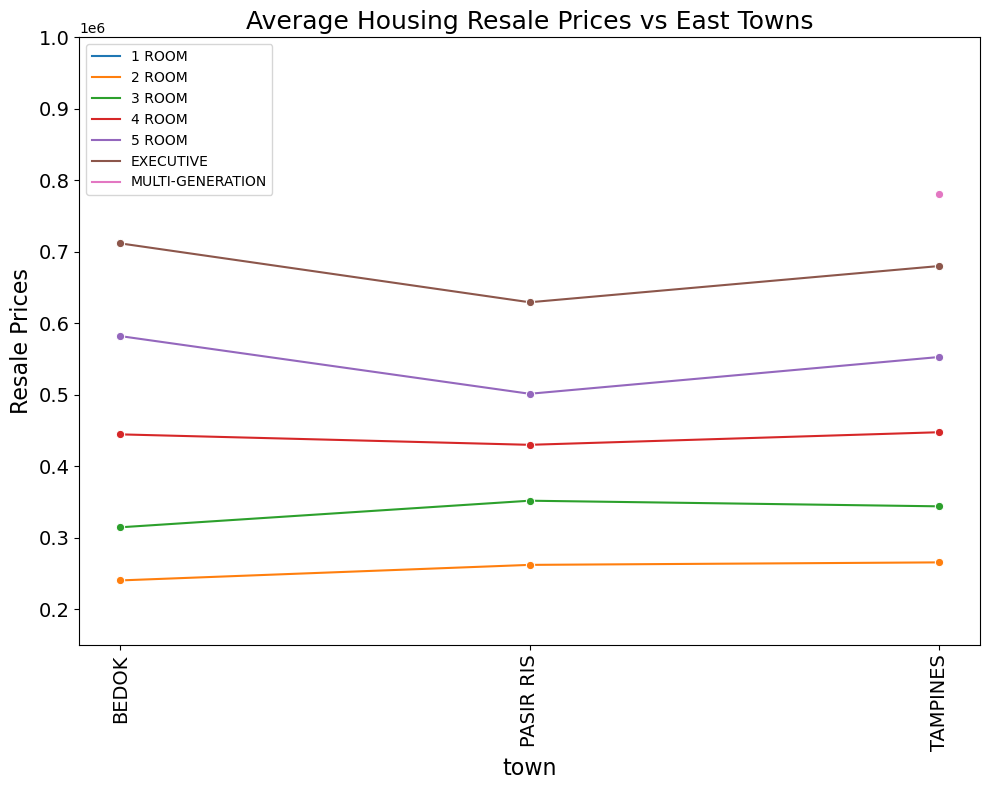

In [79]:
plt.figure(figsize=(10,8))
# Setting hue_order
order=house['flat_type'].sort_values().unique()
# Create lineplot of average resale prices against east towns
sns.lineplot(data=east_price,x='town',y='resale_price', hue='flat_type', hue_order=order, markers=True, marker='o')
plt.xticks(rotation =90,fontsize=14)
plt.yticks(fontsize=14)
plt.title('Average Housing Resale Prices vs East Towns', fontsize=18)
plt.xlabel(xlabel='town', fontsize=16)
plt.ylabel(ylabel='Resale Prices', fontsize=16)
plt.ylim(150000,1000000)
plt.legend(loc='upper left')
plt.tight_layout()

$\color{red}{\text{East Zone Analysis:}}$

There is no data on 1 Room for inference in East Zone for the time period of analysis.

For the 2 Room, the average HDB housing resale prices do not vary much across the East towns, with the lowest in Bedok at 240144 dollars and the highest is in Tampines at 265383 dollars. 

For the 3 Room, the average HDB housing resale prices do not vary much across the East towns with the lowest in Bedok at 314469 dollars and the highest in Pasir Ris at 351668 dollars.

For the 4 Room, the average HDB housing resale prices appears to be constant throughout the 3 East towns, and is lowest in Pasir Ris at 429869 dollars and the highest in Bedok at 447486 dollars.

For the 5 Room, the average HDB housing resale price for Bedok is noticeably higher than the other 2 towns with the lowest in Pasir Ris at 501285 dollars and the highest in Bedok at 581996 dollars.

For the Executive, the average HDB housing resale prices follows the same trend as the 5 Room counterparts, and is lowest in Pasir Ris at 629323 dollars and the highest in Bedok at 711731 dollars.

There is only 1 data point on Multi-Generation which belongs to Tampines, not much inference can be done.

**In the East Zone, Tampines is the most expensive town for 2 Room. Pasir Ris is the most expensive town for 3 Room but the cheapest town for 4 Room, 5 Room and Executive. Bedok is the most expensive town for 4 Room, 5 Room and Executive but is the cheapest town for 2 Room and 3 Room.**

$\color{red}{\text{Overall Town Analysis:}}$
 
From the above different Zones analysis, it can be seen that the Central Zones towns have the most expensive average HDB housing resale prices. Towns that have cheapest average HDB housing resale prices can be found in west (Choa Chu Kang), east (Pasir Ris) and north (Sembawang, Woodlands and Yishun) zones. 

The price difference between the most expensive town and the cheapest town for:

- 4 Room (366662 dollars difference)
- 5 Room (501252 dollars difference)
- Executive (441578 dollars difference)

In conclusion, towns that are more centrally located are generally more expensive that those towns that lies on the edge of Singapore.

### 2.3.5 Flat Type/Model

*flat_model*, *flat_type* and *full_flat_type* columns represent the flat type/model of the HDB flat. I will keep both the ***flat_model*** and ***flat_type*** columns to create a new column of *flat_type_model* that shows the numerical label encoding of the various flat_type_model.

In [80]:
house['flat_type'].sort_values().unique()

array(['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE',
       'MULTI-GENERATION'], dtype=object)

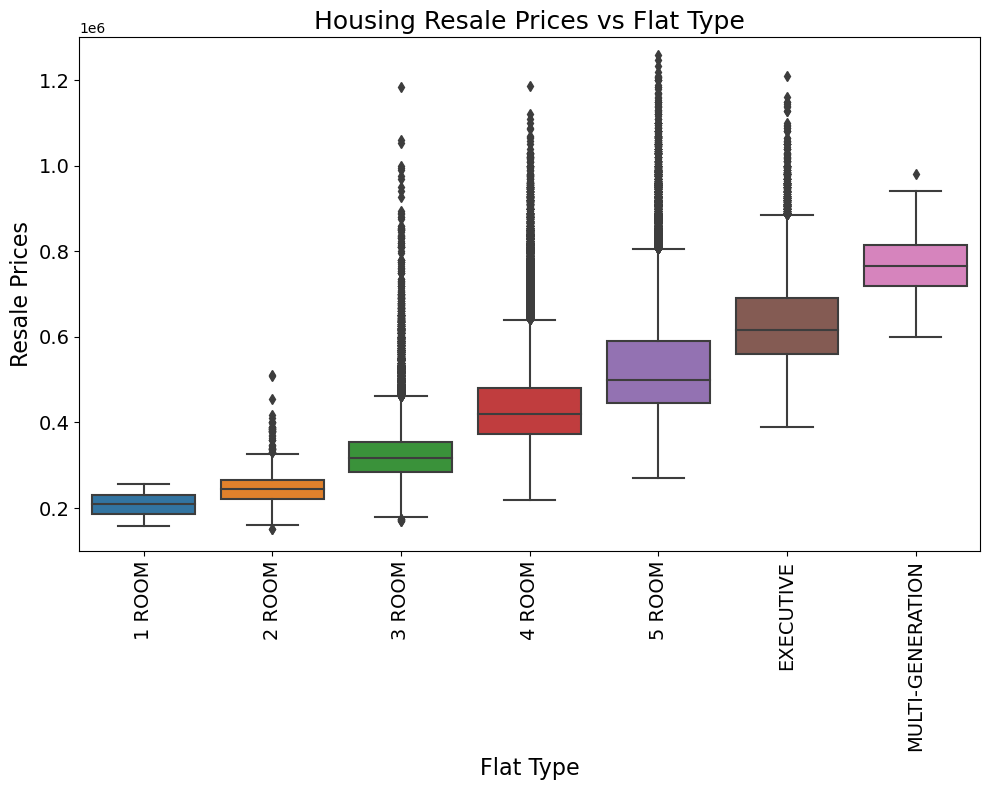

In [81]:
plt.figure(figsize=(10,8))
cat_order=house['flat_type'].sort_values().unique()
# Create the box plot
sns.boxplot(x='flat_type', y='resale_price', data=house, order=cat_order)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)
plt.title('Housing Resale Prices vs Flat Type', fontsize=18)
plt.xlabel(xlabel='Flat Type', fontsize=16)
plt.ylabel(ylabel='Resale Prices', fontsize=16)
plt.ylim(100000,1300000)
plt.tight_layout()

$\color{red}{\text{Flat Type Boxplot Analysis:}}$

From the Flat Type boxplot, it can be seen that 2, 3, 4, 5 Room and Executive have outliers with the highest outlier for 5 Room.

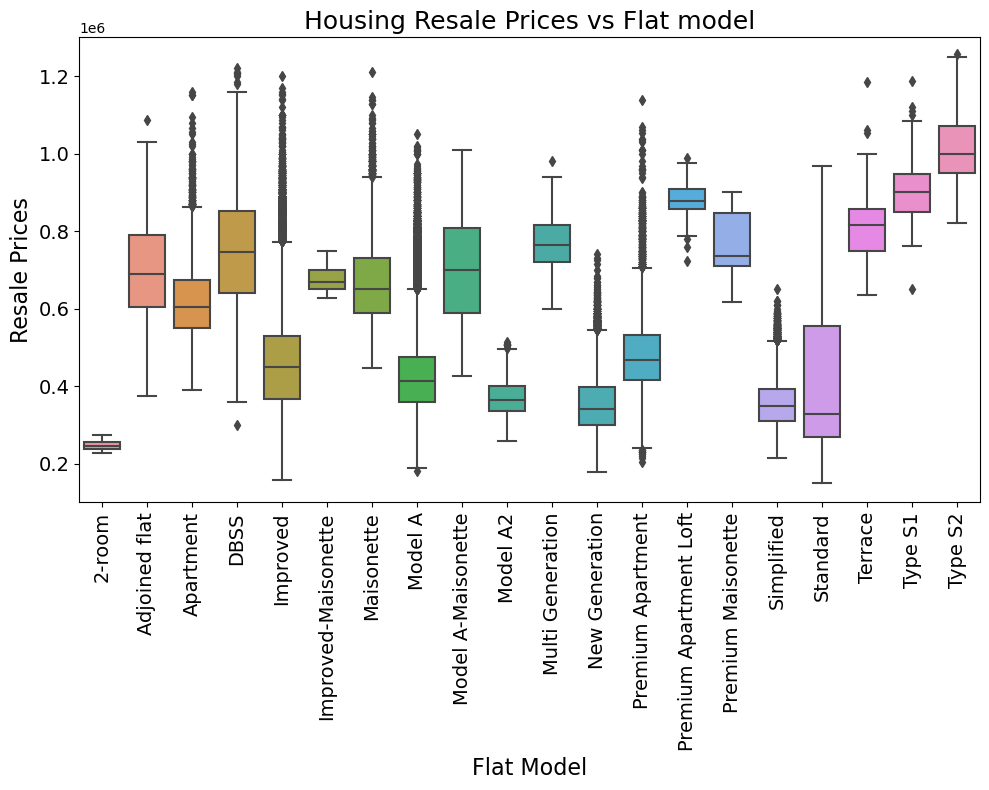

In [82]:
plt.figure(figsize=(10,8))
model_order=house['flat_model'].sort_values().unique()
# Create the box plot
sns.boxplot(x='flat_model', y='resale_price', data=house, order=model_order)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)
plt.title('Housing Resale Prices vs Flat model', fontsize=18)
plt.xlabel(xlabel='Flat Model', fontsize=16)
plt.ylabel(ylabel='Resale Prices', fontsize=16)
plt.ylim(100000,1300000)
plt.tight_layout()

$\color{red}{\text{Flat Model Boxplot Analysis:}}$

From the Flat Model, it can be seen that Apartment, Improved, Model A and Premium Apartment has the most number of outliers.


In [83]:
# Flat type/model summary statistics
housegroup_price=house.groupby(['flat_type', 'flat_model'])['resale_price'].describe()
housegroup_price

count          mean            std  \
flat_type        flat_model                                                     
1 ROOM           Improved                   82.0  2.070155e+05   25312.327601   
2 ROOM           2-room                      4.0  2.480000e+05   20314.198647   
                 DBSS                        1.0  3.000000e+05            NaN   
                 Improved                  521.0  2.433968e+05   29701.908914   
                 Model A                   739.0  2.492635e+05   35476.617856   
                 Premium Apartment          37.0  2.526486e+05   23215.435737   
                 Standard                  594.0  2.425258e+05   40609.633966   
3 ROOM           DBSS                      184.0  5.057995e+05   66633.216495   
                 Improved                10240.0  3.185922e+05   64043.589585   
                 Model A                  8454.0  3.464331e+05   70441.272046   
                 New Generation          15227.0  3.195812e+05   46967.210168   
                 Premium Apartment         417.0  4.101056e+05  109914.326266   
                 Simplified               1930.0  3.089144e+05   48663.094778   
                 Standard                 2522.0  3.088260e+05   83809.262011   
                 Terrace                    86.0  8.108271e+05   99147.208013   
4 ROOM           Adjoined flat              27.0  6.090370e+05  141296.869561   
                 DBSS                      604.0  6.952812e+05   97086.859000   
                 Improved                 1847.0  4.466089e+05   94688.011265   
                 Model A                 35127.0  4.551612e+05  112906.642121   
                 Model A2                 2064.0  3.691446e+05   44060.981144   
                 New Generation           8139.0  4.176189e+05   65693.528178   
                 Premium Apartment        7667.0  4.576414e+05   86622.398506   
                 Premium Apartment Loft     36.0  8.900216e+05   43606.138611   
                 Simplified               5309.0  3.764467e+05   66768.293938   
                 Standard                   65.0  4.524335e+05   82413.449244   
                 Terrace                     9.0  8.898889e+05   65704.726703   
                 Type S1                   242.0  9.050422e+05   72102.401639   
5 ROOM           Adjoined flat             138.0  6.679009e+05  126399.966182   
                 DBSS                      869.0  8.384621e+05  124476.299897   
                 Improved                25824.0  5.244923e+05  122574.635777   
                 Improved-Maisonette        19.0  6.775731e+05   35148.135044   
                 Model A                  1941.0  5.545959e+05  116685.087164   
                 Model A-Maisonette        262.0  6.978675e+05  142698.445438   
                 Premium Apartment        5535.0  4.946403e+05   90667.013017   
                 Premium Apartment Loft     14.0  8.483269e+05   62033.361613   
                 Standard                 1686.0  6.189874e+05  145904.901385   
                 Type S2                   127.0  1.019220e+06   85651.761256   
EXECUTIVE        Adjoined flat              95.0  7.587183e+05  104955.331778   
                 Apartment                6080.0  6.203250e+05   98513.733721   
                 Maisonette               4364.0  6.743700e+05  114370.347041   
                 Premium Apartment        1435.0  5.591411e+05   64671.427632   
                 Premium Maisonette         15.0  7.605333e+05   95648.065223   
MULTI-GENERATION Multi Generation           56.0  7.679920e+05   77867.985088   

                                              min       25%        50%  \
flat_type        flat_model                                              
1 ROOM           Improved                157000.0  185000.0   209000.0   
2 ROOM           2-room                  227000.0  236750.0   245000.0   
                 DBSS                    300000.0  300000.0   300000.0   
                 Improved  

$\color{red}{\text{Flat Type/Model Analysis:}}$

**1. Standard Deviation**
- 2 Room Model A and Standard has pretty wide difference.
- 3 Room New Generation and Simplified has the narrowest difference while Premium has a difference of 100K with Standard model trailing at 80k differnce.
- 4 Room Model A and Adjoined models has the widest difference of more than 120 - 140K.
- 5 Room Improved Masionette has the lowest difference of 35K. Standard and Model A-Mansionettes have the widest difference of 140++K

**2. Mean Price (Excluding Terrace, DBSS, Premium & Lofts)**
- 2 Room approximately 250k.
- 3 Room approximately 300k - 350K.
- 4 Room 370k - 450k *(4 Rooms Flats has the most variations with difference sizes. As such, the price range is wide for this category)*
- 5 Room 524K - 1mil *(5 Room variations and sizes like 4 rooms reflect a wide gap in price differences)*.
- Executive Flats ranges around 620k to 760k

**3. Max Price Flat Type**
- 2 Room Standard 510000
- 3 Room Standard 723000
- 4 Room Model A 1050000 (Loft / Premium / Adjoined / S1 / Terrace not considered in this catgory) 
- 5 Room Improved 1200000 (Loft / Premium / Adjoined / S2 not considered in this catgory)
- Executive Mansionette 1210000


**Note:** 

- *3 and 4 Room Terrace is disregarded in this comparison because it belongs to a different category flat type. It is an older version of public housing, resembling a landed Semi-D with floor area mostly bigger than 5 Room Executive with its own 'garden'.* 
- *4 Room Model A2 are under the SERS scheme started in late 1990s. They are usually smaller then the older 4 Room Model A by around 15 - 20sqm (https://www.teoalida.com/singapore/serslist/).
- *Premium Apartment Lofts are unique flat type where only few estate has it. Eg: Bishan and the newer ones in Queenstown*
- *Multi-Generation Flats are only available in Bishan, Tampines and Yishun. These are replaced by the Adjoined Flats in the 1990s.*
- *Types of Flats no longer built by HDB (https://dollarsandsense.sg/5-types-hdb-flats-not-longer-built-singapore/).
- *S1 4 Room and S2 5 Room types are unique models only found in Pinacle@Duxton*
- *Buyers should be prepared to pay a higher price for DBSS, Premium, Terrace and Loft types of model.*

### 2.3.7 Rooms Sold/Rented Columns

There are 12 columns that represent the number of rooms sold and number of rooms rented. 

1) Rooms Sold
*1room_sold* ,*2room_sold*, *3room_sold*, *4_room_sold*, *5_room_sold*, *exec_sold*, *multigen_sold* and *studio_apartment_sold* columns  show the number of rooms sold with respect to that particlular address.

2) Rooms Rented
*1room_rental*, *2room_rental* and *3room_rental* columns  show the number of rooms sold or rented with respect to that particlular address.

In [84]:
# Creating a dataframe of rooms sold 
house_sold=house.iloc[:,29:37]

# Adding column resale_price to house_sold
house_sold['resale_price']=house['resale_price']

<Figure size 1000x800 with 0 Axes>

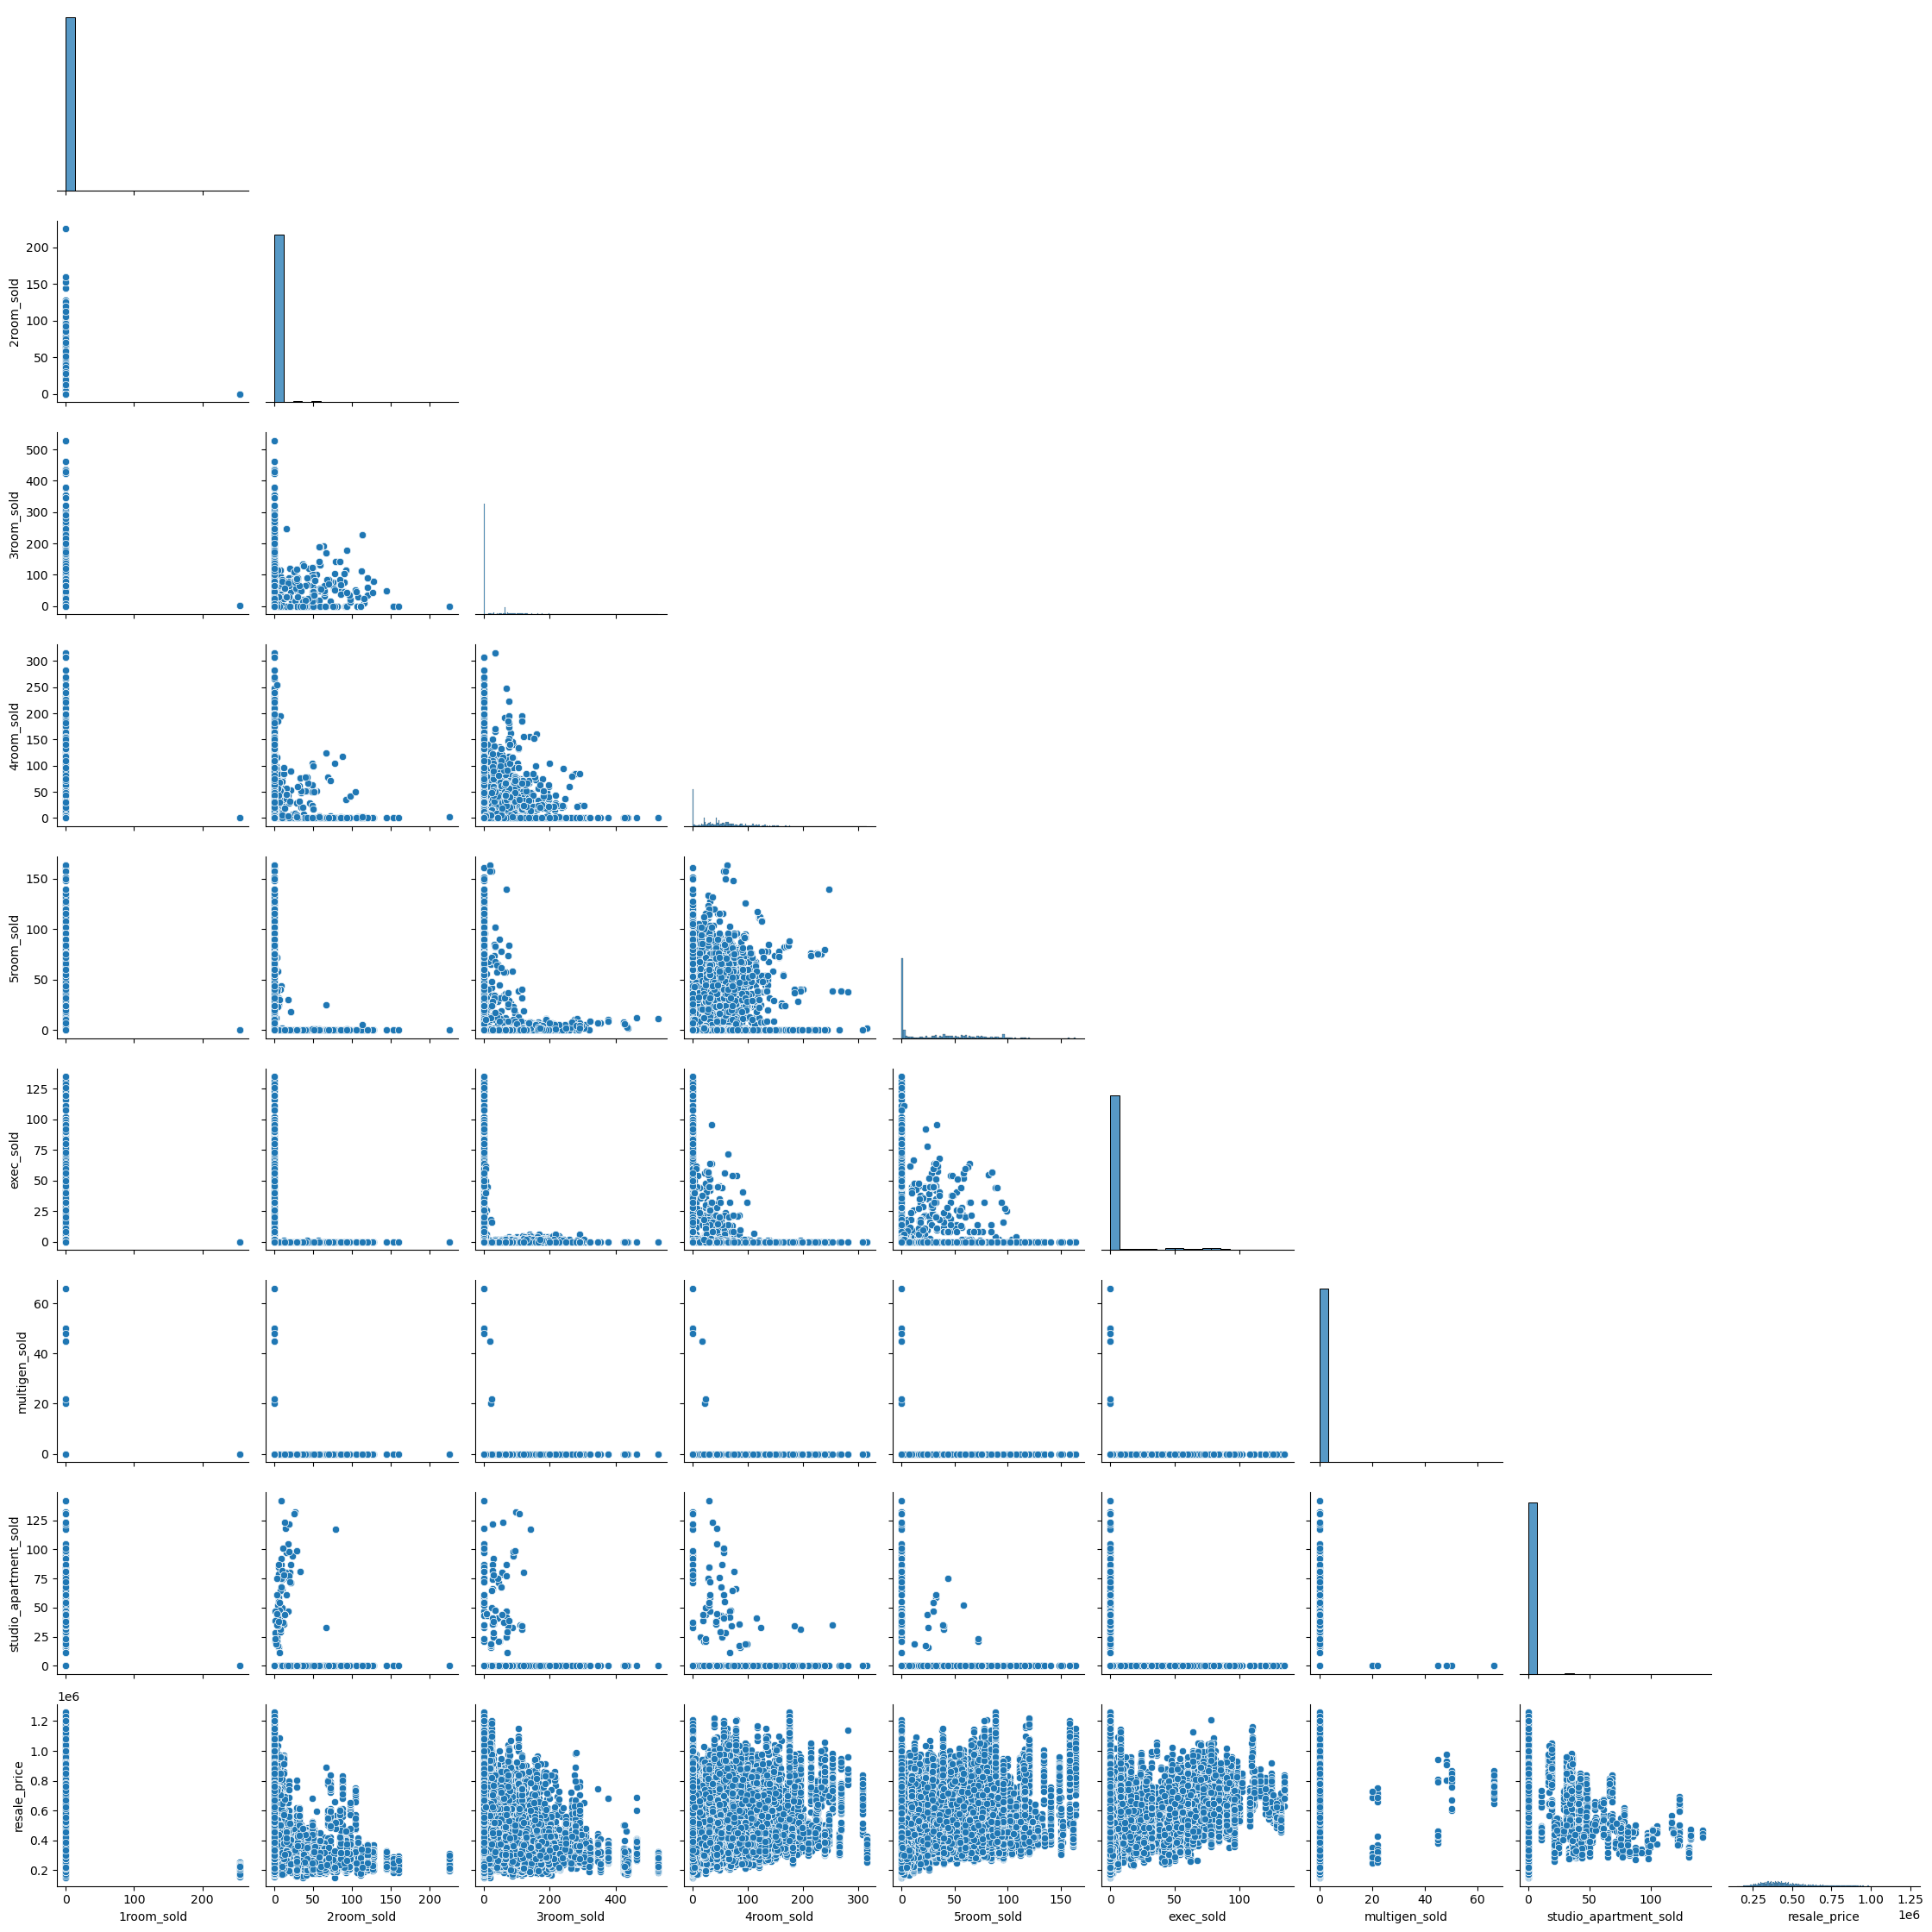

In [85]:
# Creating a pair plot of house_sold
plt.figure(figsize=(10,8))
sns.pairplot(data=house_sold, kind='scatter', corner=True)
plt.tight_layout()
plt.show();

In [86]:
# Creating a dataframe of rooms rented 
house_rent=house.iloc[:,37:41]

# Adding column resale_price to house_rent
house_rent['resale_price']=house['resale_price']

<Figure size 1000x800 with 0 Axes>

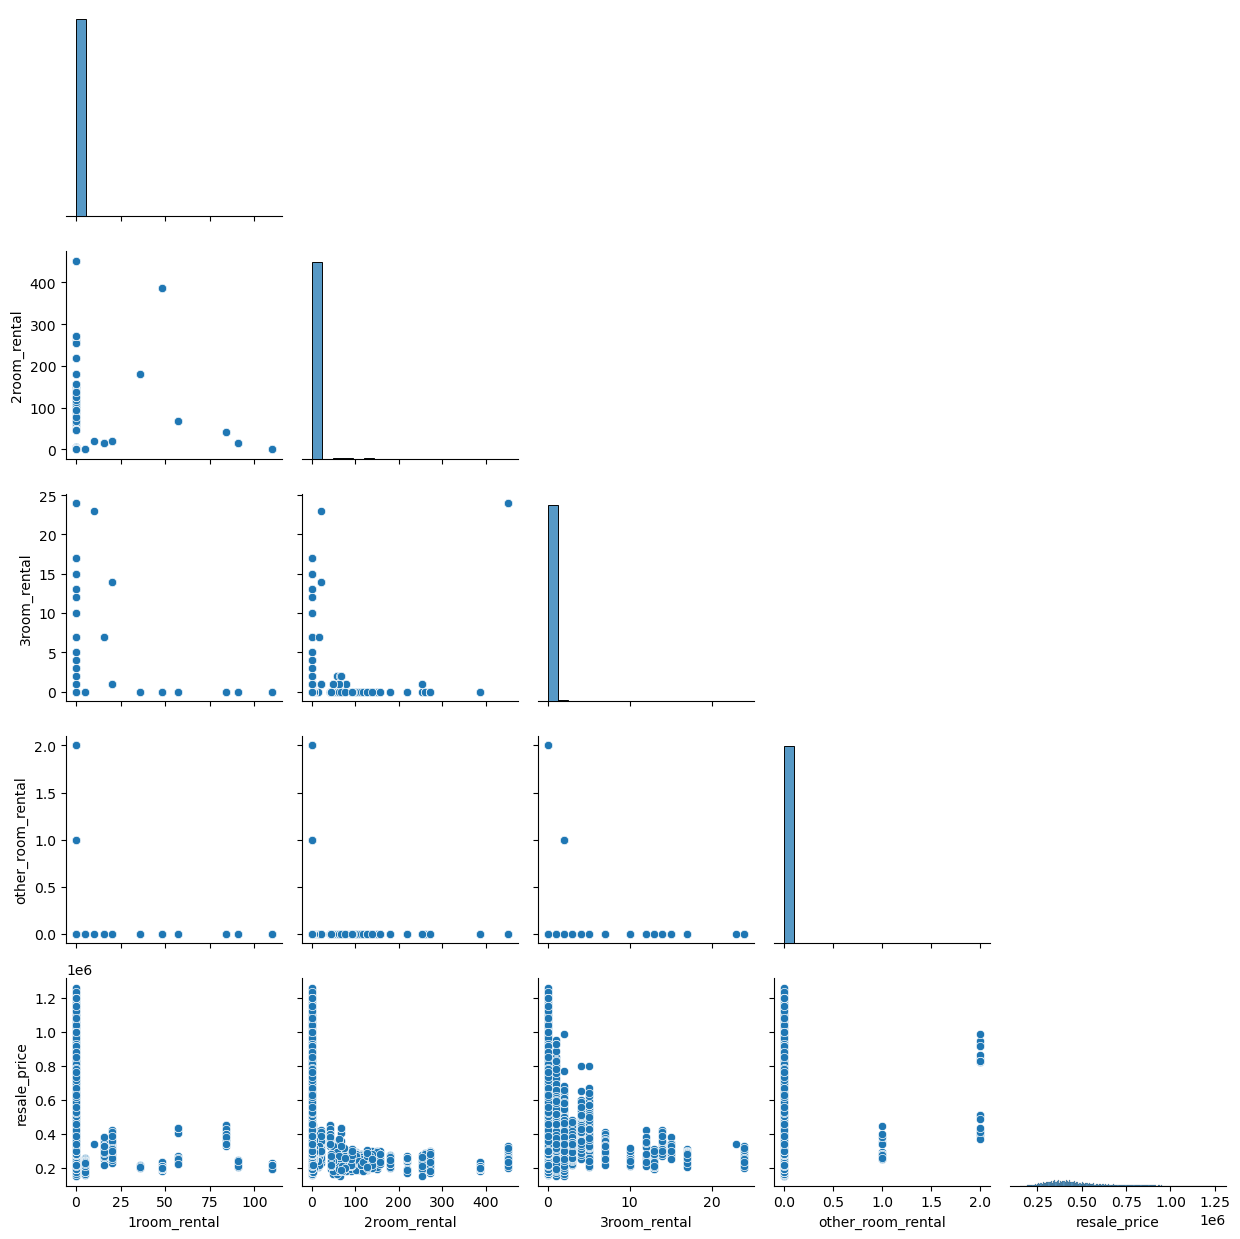

In [87]:
# Creating a pair plot of house_sold
plt.figure(figsize=(10,8))
sns.pairplot(data=house_rent, kind='scatter', corner=True)
plt.tight_layout()
plt.show();

$\color{red}{\text{Rooms Sold/Rented Analysis:}}$

Looking at both the pairplots above, there do not seem to have any relationship between HDB housing resale prices with either rooms sold or rented. Hence, I will drop these 12 columns.

### 2.5 Types of Dwellings/Amenities

There are 3 columns that represent the types of dwellings provided within that particular address. 

1) Residential
*residential* column represents the whole block of flats is fully residential.

2) Commericial
*commercial* column represents the presence of a commercial entity within the block of the particular address. 

3) Market/Hawker
*market_hawker* column represnts the presence of a market or hawker within the block of flats of that particular address.

4) MultiStorey Carpark
*multistorey_carpark* column represents the presence of a multi-storey carpark for that particular address.

5) Total Dwelling Units
*total_dwelling_units* column shows the total number of residential units within the block of the particular address.

In [88]:
# Creating a new dataframe with those columns having the dwelling/amenities values
house_dwell_am=house.iloc[:,23:29].copy()
house_dwell_am.head()

residential commercial market_hawker multistorey_carpark precinct_pavilion  \
0           Y          N             N                   N                 N   
1           Y          N             N                   N                 N   
2           Y          N             N                   N                 N   
3           Y          Y             N                   N                 N   
4           Y          N             N                   N                 N   

   total_dwelling_units  
0                   142  
1                   112  
2                    90  
3                    75  
4                    48

In [89]:
dwell_am_list=['residential', 'commercial','market_hawker','multistorey_carpark','precinct_pavilion']
#
for i in dwell_am_list:
    house_dwell_am[i] = house_dwell_am[i].replace({'Y':1,'N':0})


In [90]:
# Adding resale price column to house_dwell_am dataframe
house_dwell_am['resale_price']=house['resale_price']

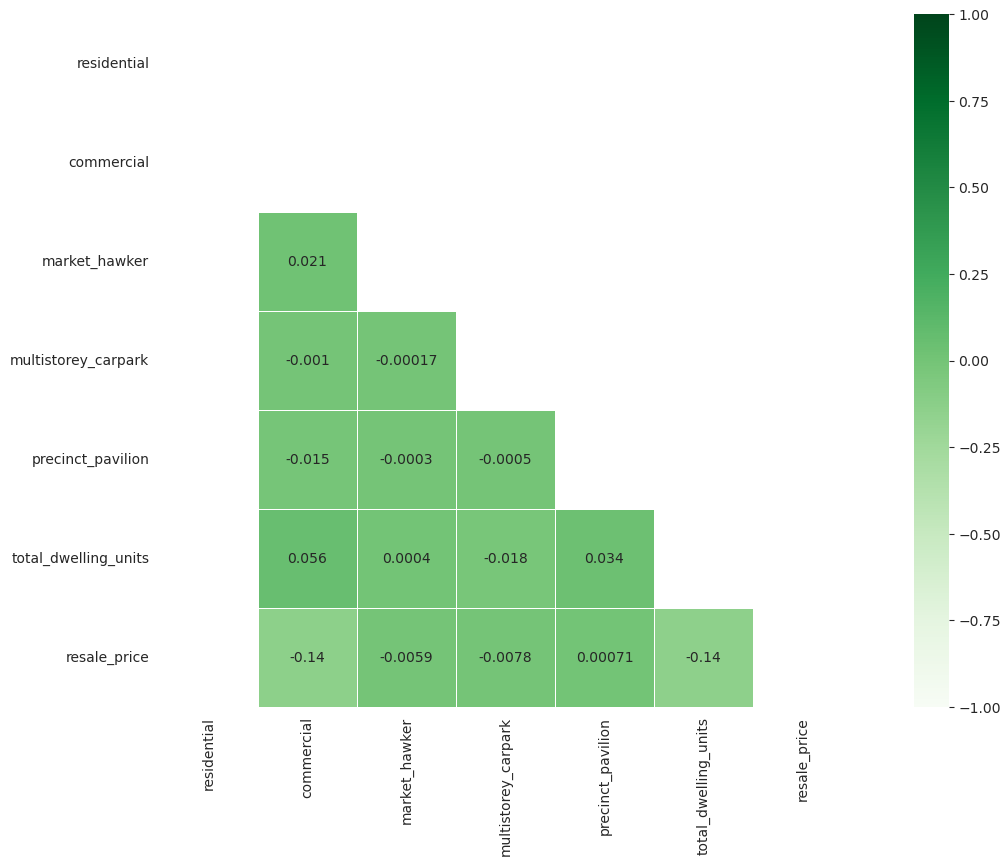

In [91]:
# Visualization heatmap of the correlation of the dwelling/amenities columns relatve to resale price
# Establish size of figure.
plt.figure(figsize = (16,9))

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(house_dwell_am.corr())
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(house_dwell_am.corr(), mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5, cmap='Greens')

$\color{red}{\text{Types of Dwellings Analysis:}}$

As can be seen from the above correlation heatmap, I will drop all of these columns as the absolute value of the correlation coefficients are lesser than 1. This implies that the effect of these variables against the HDB housing resale prices are insignificant.

### 2.6 Hawker Food & Market Stalls

There are 6 columns that pertaining to the hawker and market stalls within the vicinity of the particular address. 3 of the columns have being dropped earlier because they contain thousands of null values. So I will analyze the remaining 3:

 1) Hawker_Nearest_Distance
*hawker_nearest_distance* column shows the distance between the flat and the nearest hawker center.

2) Hawker Food Stalls
*hawker_food_stalls* column shows the number of food stalls with that hawker center nearest to the particular flat. 

3) Hawker Market Stalls
*hawker_market_stalls* column shows the number of market stalls with that hawker center nearest to the particular flat. 

In [92]:
# Creating a new dataframe with those columns having the hawker center values
house_hawker=house[['Hawker_Nearest_Distance','hawker_food_stalls','hawker_market_stalls']]
house_hawker.head()

Hawker_Nearest_Distance  hawker_food_stalls  hawker_market_stalls
0               154.753357                  84                    60
1               640.151925                  80                    77
2              1762.082341                  84                    95
3               726.215262                  32                    86
4              1540.151439                  45                     0

In [93]:
# Adding resale price column to house_hawker dataframe
house_hawker['resale_price']=house['resale_price']

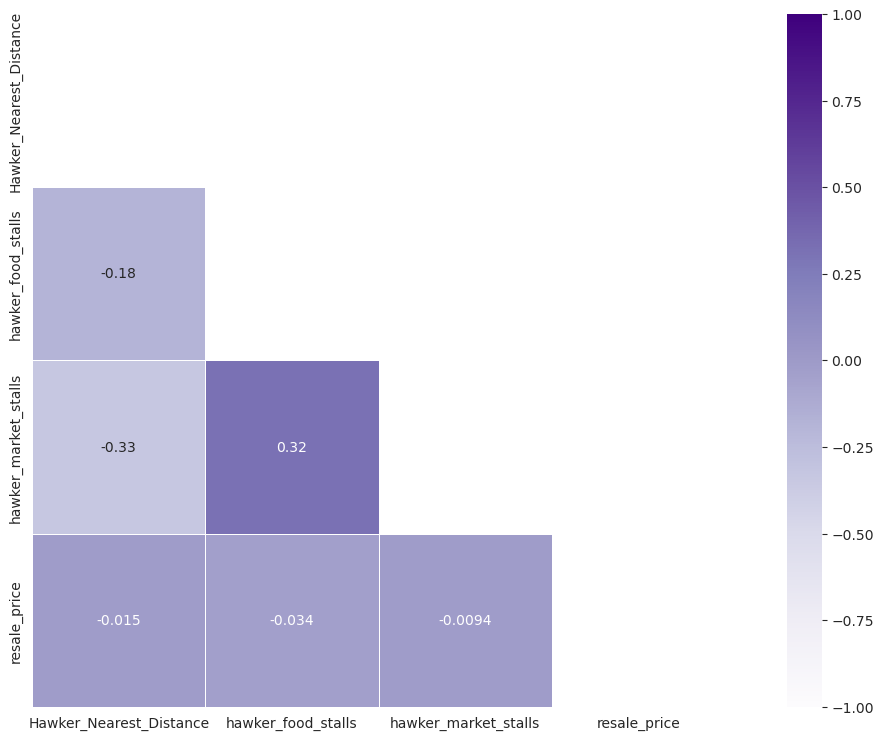

In [94]:
# Visualization heatmap of the correlation of the null columns relatve to resale price
# Establish size of figure.
plt.figure(figsize = (16,9))

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(house_hawker.corr())
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(house_hawker.corr(), mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5, cmap='Purples')

$\color{red}{\text{Hawker Food & Market Stalls Analysis:}}$
 
From the above hawker food & market stalls correlation heatmap, it can be seen that all the hawker food & market stalls features have very insignificant impact on HDB housing resale prices. Hence, all these columns will be dropped.

### 2.7 Public Transport

There are 10 columns that represent the public transports provided within that particular address.

1) MRT (Mass Rapid Transit)

- *mrt_nearest_distance* column shows the nearest distance of MRT station to that particular address .
- *mrt_name* column shows the name of the MRT station within that particular address.
- *mrt_interchange* column shows whether the MRT station is an interchange.
- *mrt_latitude* and *mrt_longitude* columns show the location of the MRT station for that particular address.

2) Bus

- *bus_stop_nearest_distance* column shows the nearest distance of MRT station to that particular address .
- *bus_stop_name* column shows the name of the MRT station within that particular address.
- *bus_interchange* column shows whether particular address is near a bus interchange.
- *bus_stop_latitude* and *bus_stop_longitude* columns show the location of the bus stop station for that particular address.

In [95]:
# Creating a new dataframe with those columns having the public tranport values
house_transport = house.iloc[: , 55:65].copy()
house_transport['mrt_name']=house_transport['mrt_name'].factorize()[0]
house_transport['bus_stop_name']=house_transport['bus_stop_name'].factorize()[0]

In [96]:
# Adding resale price column to house_transport dataframe
house_transport['resale_price']=house['resale_price']

In [97]:
house_transport.head()

mrt_nearest_distance  mrt_name  bus_interchange  mrt_interchange  \
0            330.083069         0                0                0   
1            903.659703         1                1                1   
2           1334.251197         2                1                0   
3            907.453484         1                1                1   
4            412.343032         3                0                0   

   mrt_latitude  mrt_longitude  bus_stop_nearest_distance  bus_stop_name  \
0      1.311540     103.871731                  29.427395              0   
1      1.350580     103.848305                  58.207761              1   
2      1.349561     103.749970                 214.747860              2   
3      1.350580     103.848305                  43.396521              3   
4      1.417131     103.832692                 129.422752              4   

   bus_stop_latitude  bus_stop_longitude  resale_price  
0           1.314433          103.872600      680000.0  
1           1.345659          103.855381      665000.0  
2           1.344064          103.758613      838000.0  
3           1.358045          103.845169      550000.0  
4           1.415424          103.836477      298000.0

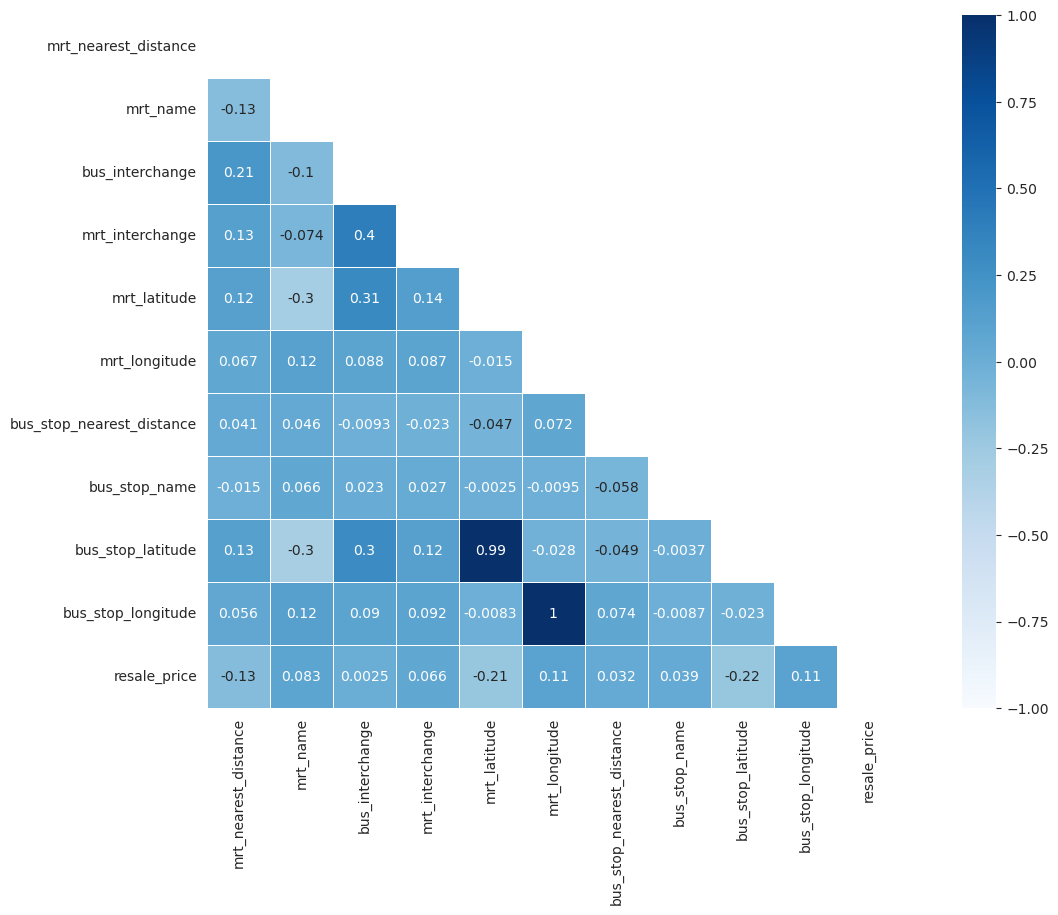

In [98]:
# Visualization heatmap of the correlation of the public transport columns relatve to resale price
# Establish size of figure.
plt.figure(figsize = (16,9))

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(house_transport.corr())
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(house_transport.corr(), mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5, cmap='Blues')

$\color{red}{\text{Public Tranport Analysis:}}$

From the above public transport correlation heatmap, it can be seen that all the public transport features have very insignificant impact on HDB housing resale prices. 

But according to a recent article written by Eugenia Liew in PropertyGuru website (https://www.propertyguru.com.sg/property-guides/mrt-effect-on-property-prices-39498), "*properties within 500m of an MRT are the most expensive. On average, a property commands a higher price of 10% to 15% when it is near to an MRT station.*"   For this housing prediction project, I will retain the ***mrt_nearest_distance*** column. I will drop *mrt_latitude* and *mrt_logitude* columns, as the columns basically shows the location of the MRT station for that particular address. 

From the bus correlation heatmap above, although both *bus_stop_latitude* and *bus_stop_longitide* columns show slight impact with the housing resale price, these 2 columns shows the location of the bus stop for that particular address. I will drop these 2 columns since the *bus_stop_nearest_distance* column (which will also be dropped)shows a very small correlation with the housing resale price, which implies that the location of the bus stop is insignificant.

The other columns will also be dropped, as mentioned in the opeining paragraph, they have very insignificant impact on HDB housing resale prices.

### 2.8 Education Institutions

There are 12 columns that represent the education institutions provided within that particular address. 

1) Primary School
*pri_sch_nearest_distance*, *pri_sch_name*, *vacancy*, *pri_sch_affliation*, *pri_sch_latitude*, and *pri_sch_longitude* columns represent the details of the primary school within that particular address. 

2) Secondary School
*sec_sch_nearest_dist*, *sec_sch_name*, *cutoff_point*, *affliation*, *sec_sch_latitude*, and *sec_sch_longitude* columns represent the details of the secondary school within that particular address. 

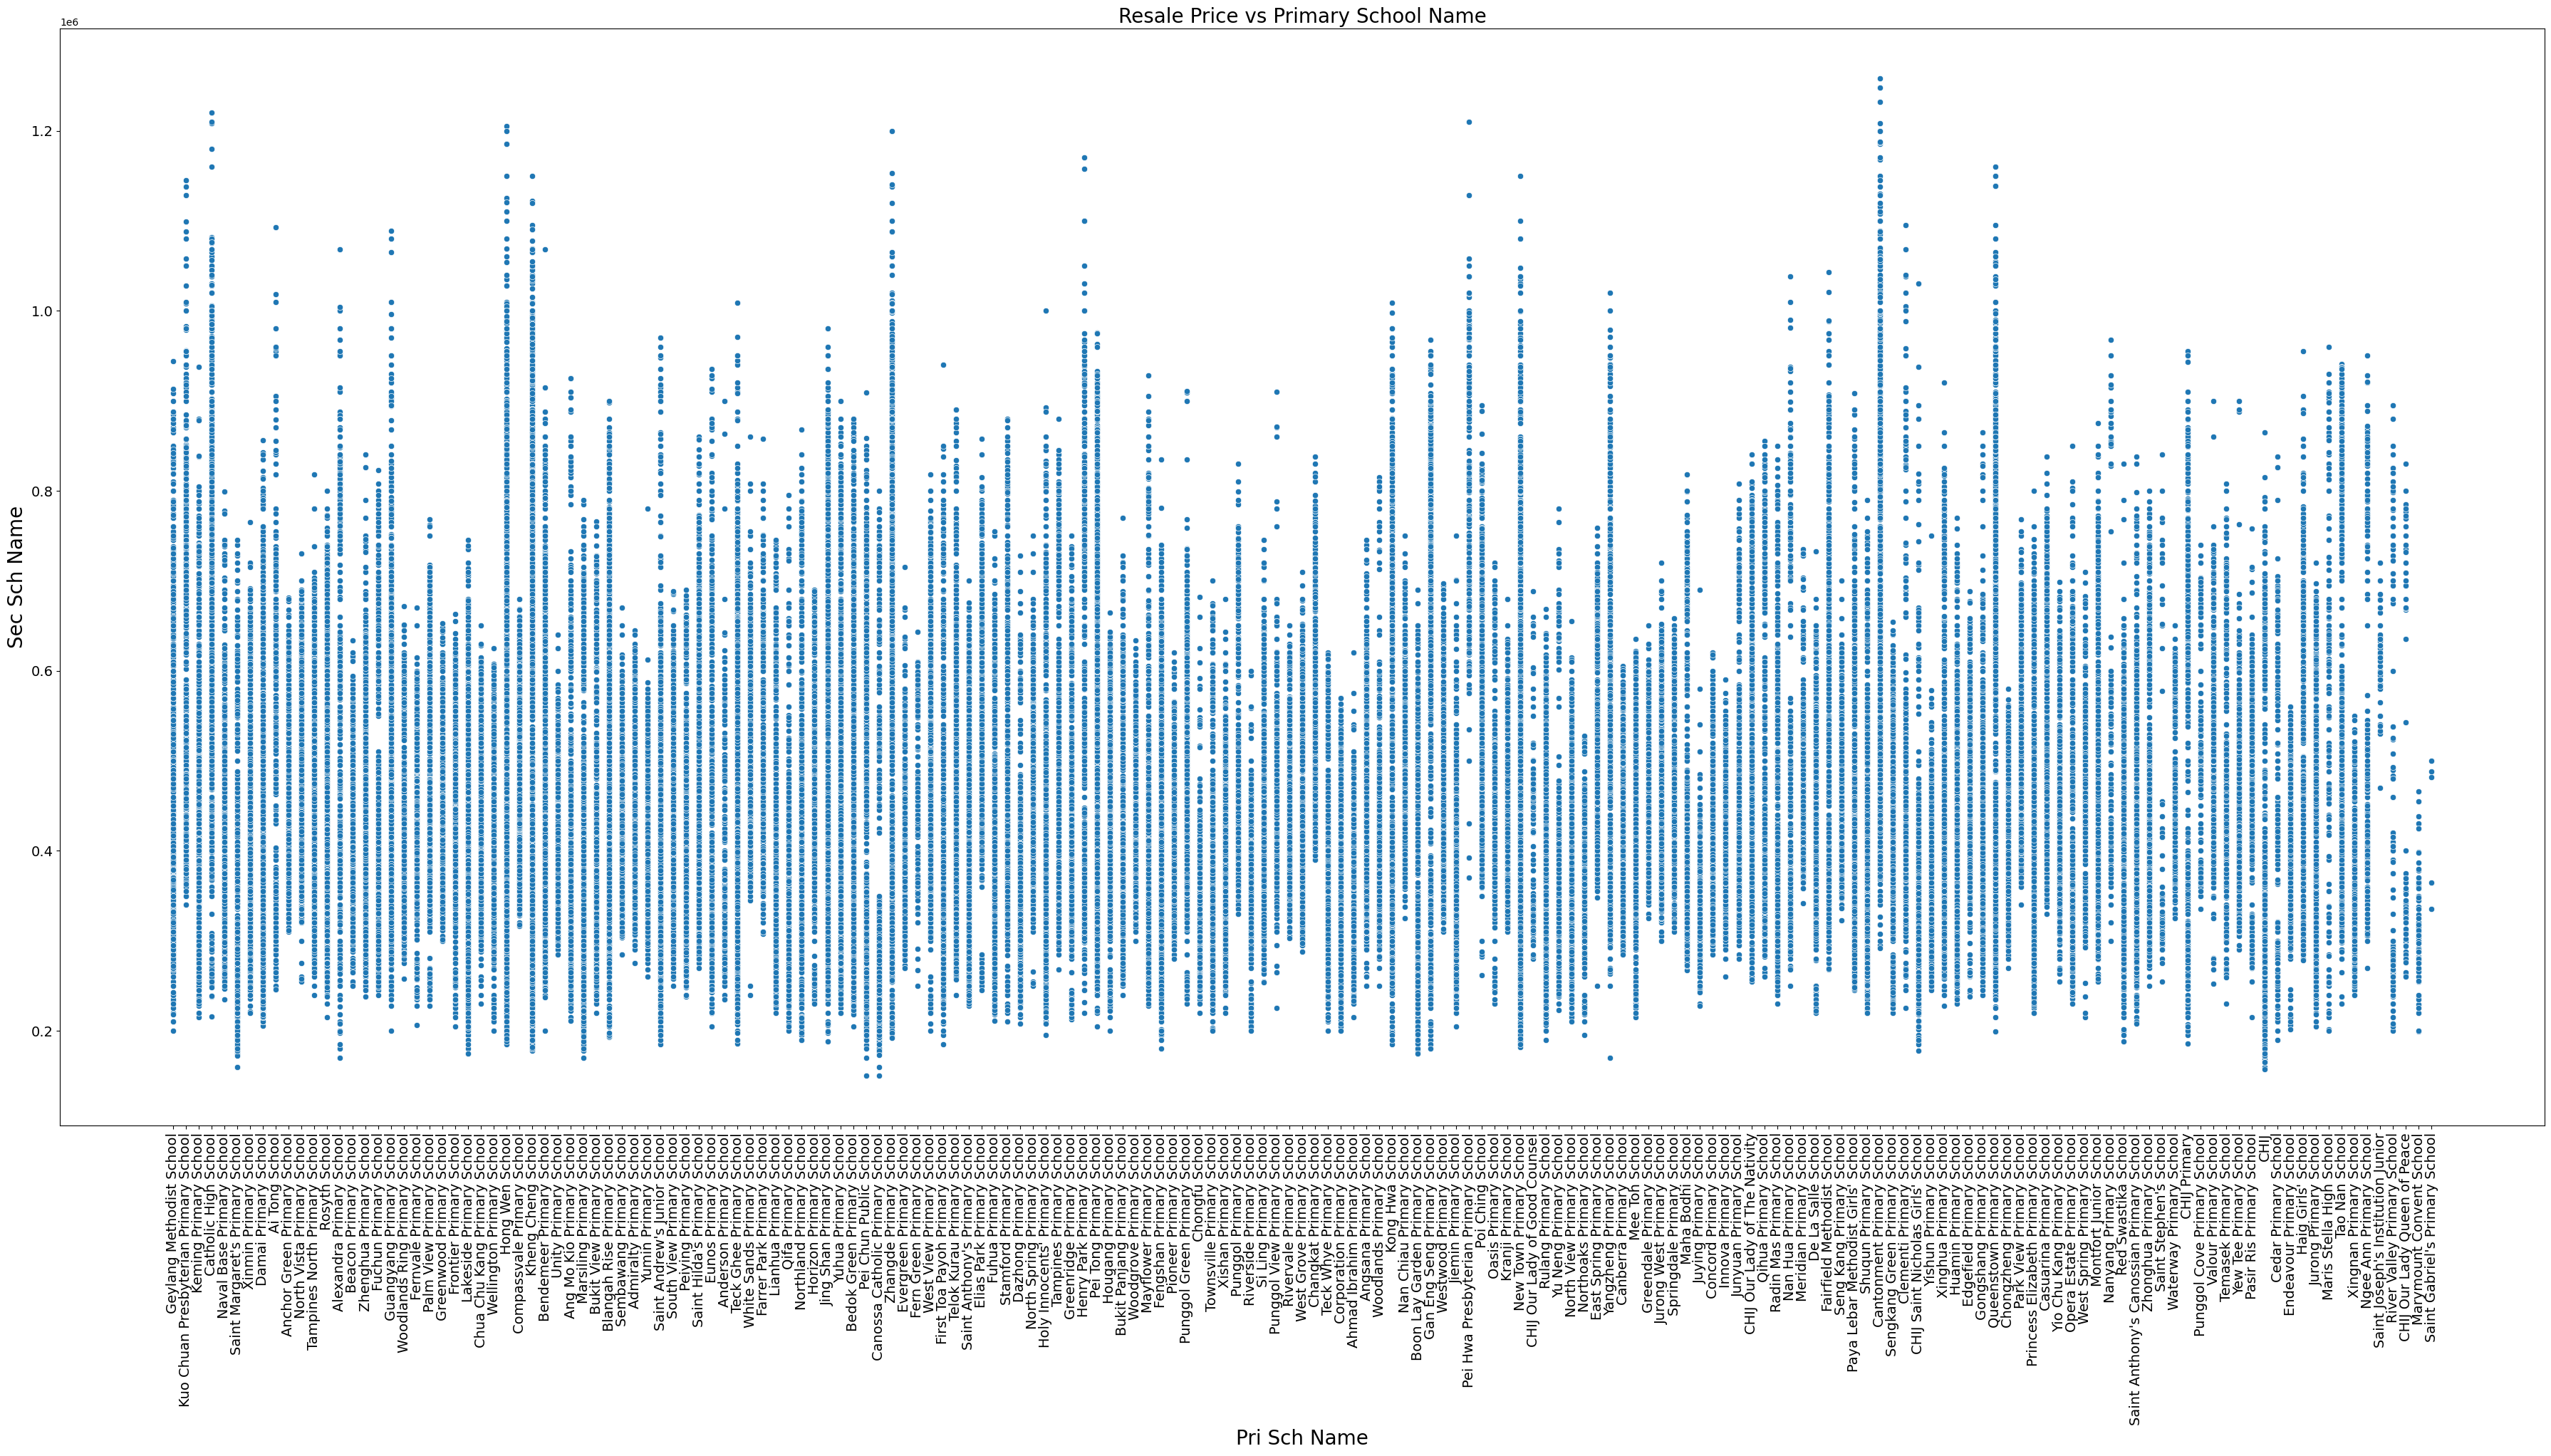

<Figure size 640x480 with 0 Axes>

In [99]:
plt.figure(figsize=(45,20))
# Create the scatter plot
sns.scatterplot(x="pri_sch_name", y="resale_price", data=house)

# Show the plot
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xlabel='Pri Sch Name',fontsize=20)
plt.ylabel(ylabel='Sec Sch Name',fontsize=20)
plt.title('Resale Price vs Primary School Name', fontsize=20)
plt.show()
plt.tight_layout();


In [100]:
pri_dist=house.groupby('pri_sch_nearest_distance')['resale_price'].mean().reset_index()
pri_dist

pri_sch_nearest_distance   resale_price
0                    45.668324  409347.826087
1                    45.991077  395156.800000
2                    49.109838  398500.000000
3                    54.264015  266500.000000
4                    54.385866  731777.777778
...                        ...            ...
9121               1880.665520  271115.384615
9122               1884.686969  542500.000000
9123               3234.040079  293882.608696
9124               3303.452239  296611.111111
9125               3305.841039  289333.333333

[9126 rows x 2 columns]

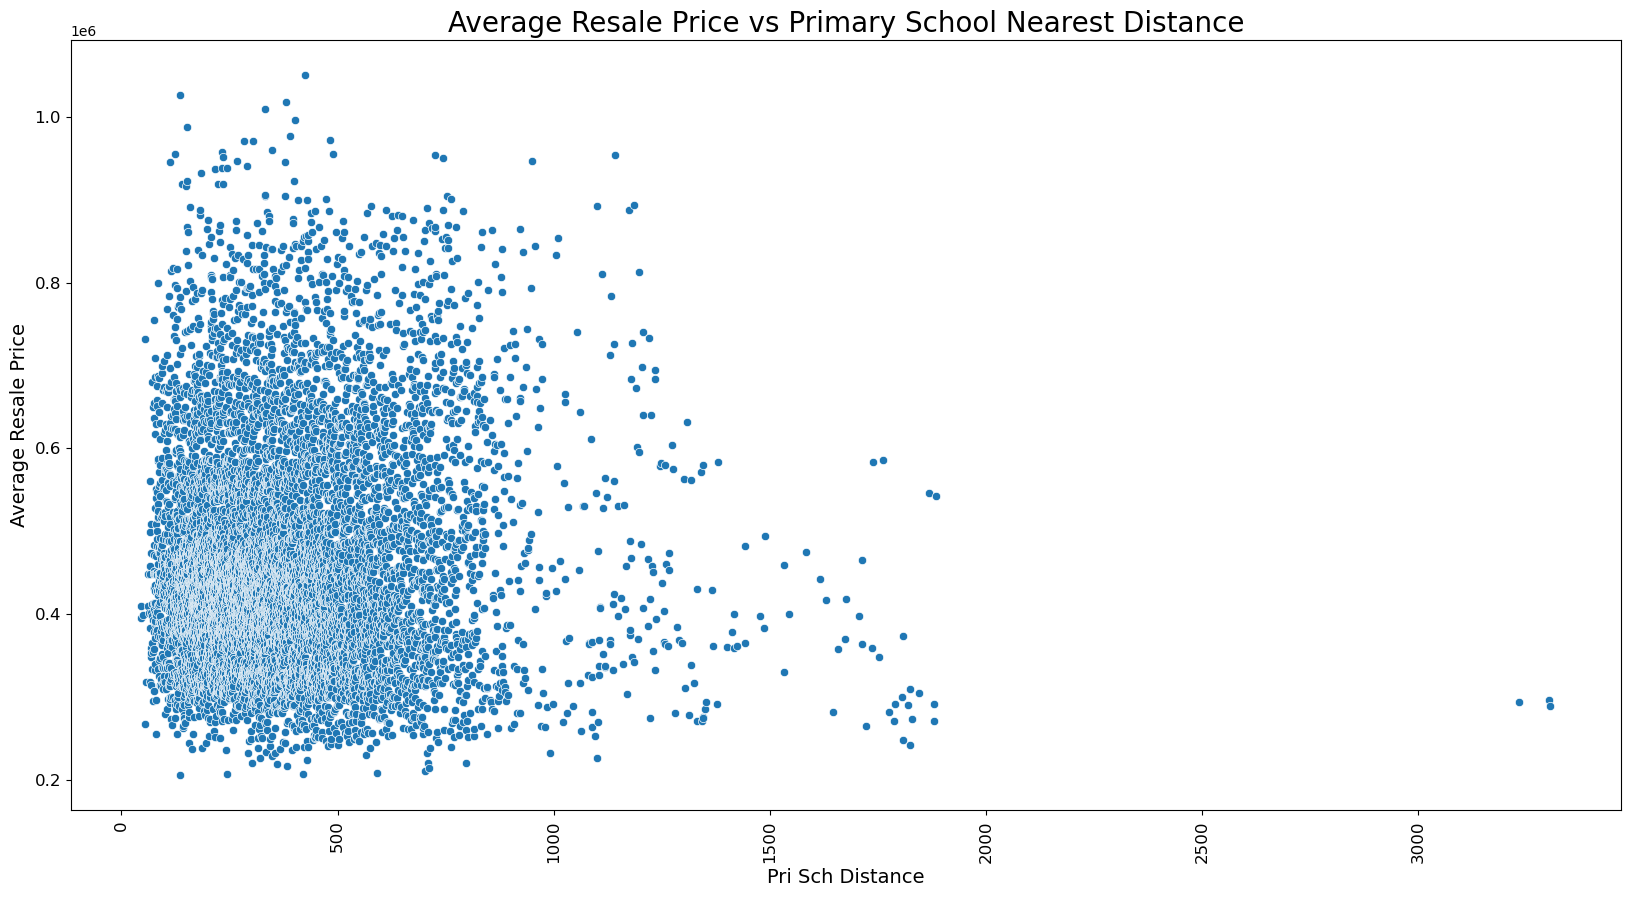

<Figure size 640x480 with 0 Axes>

In [101]:
plt.figure(figsize=(20,10))
# Create the scatter plot Secondary School Distance
sns.scatterplot(x="pri_sch_nearest_distance", y="resale_price", data=pri_dist)

# Show the plot
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(xlabel='Pri Sch Distance',fontsize=14)
plt.ylabel(ylabel='Average Resale Price',fontsize=14)
plt.title('Average Resale Price vs Primary School Nearest Distance', fontsize=20)
plt.show()
plt.tight_layout();

In [102]:
sec_dist=house.groupby('sec_sch_nearest_dist')['resale_price'].mean().reset_index()
sec_dist

sec_sch_nearest_dist   resale_price
0                38.913475  446349.142857
1                45.429070  626921.428571
2                49.205933  341420.347826
3                51.810408  497000.000000
4                57.647070  632300.000000
...                    ...            ...
9121           2206.556396  620868.200000
9122           2210.951628  426333.333333
9123           3564.247736  293882.608696
9124           3636.953504  289333.333333
9125           3638.977233  296611.111111

[9126 rows x 2 columns]

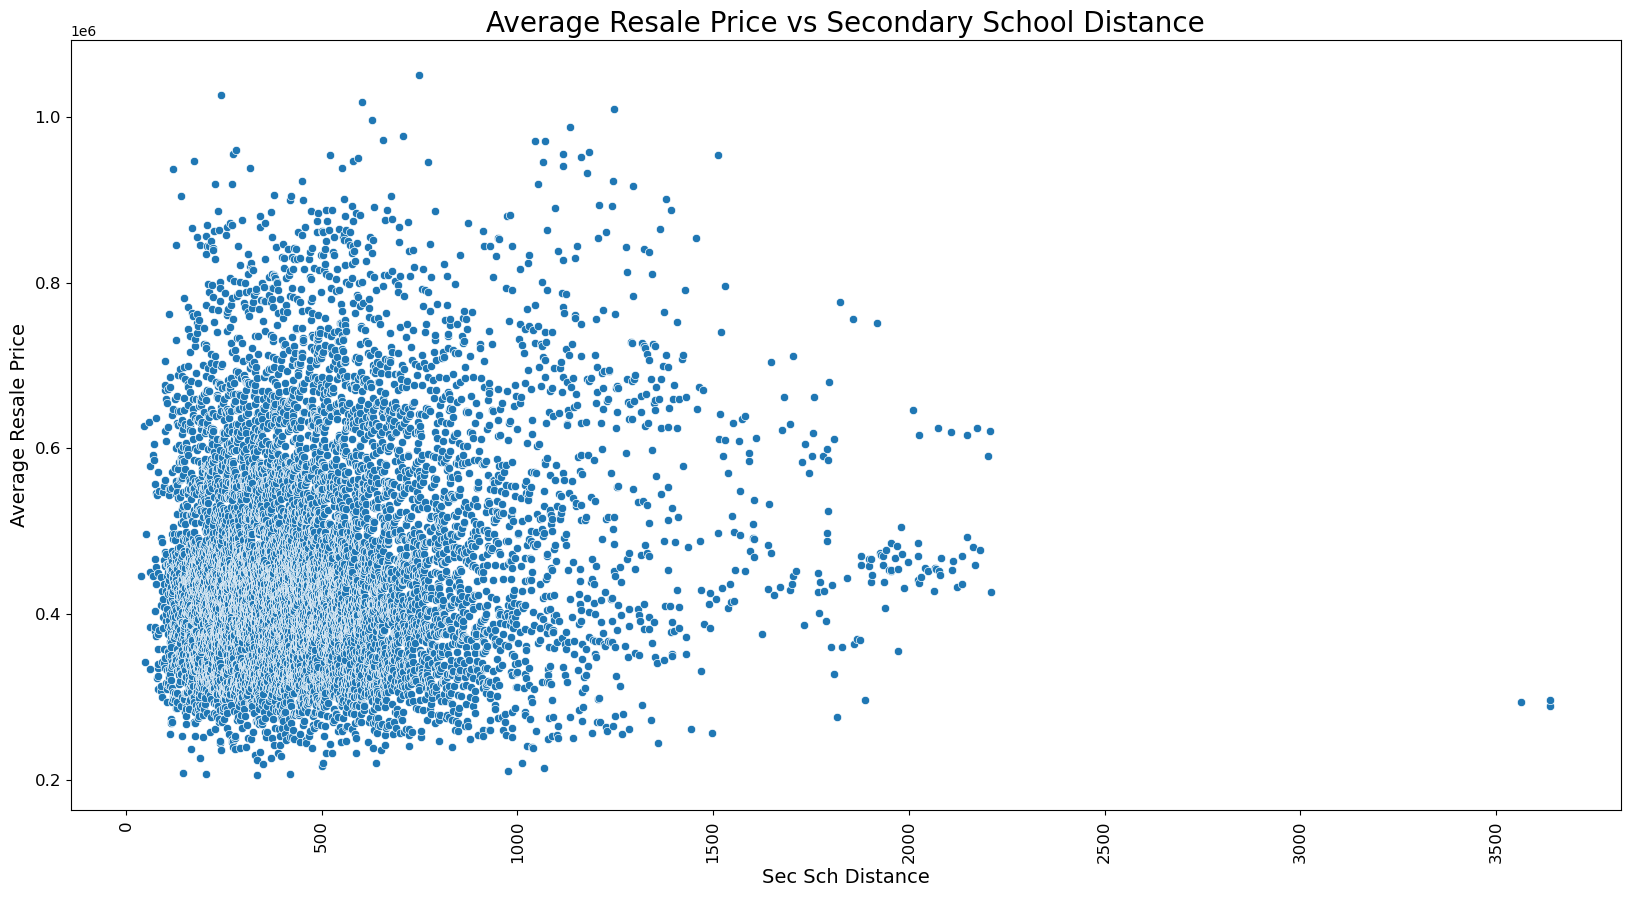

<Figure size 640x480 with 0 Axes>

In [103]:
plt.figure(figsize=(20,10))
# Create the scatter plot Secondary School Distance
sns.scatterplot(x="sec_sch_nearest_dist", y="resale_price", data=sec_dist)

# Show the plot
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(xlabel='Sec Sch Distance',fontsize=14)
plt.ylabel(ylabel='Average Resale Price',fontsize=14)
plt.title('Average Resale Price vs Secondary School Distance', fontsize=20)
plt.show()
plt.tight_layout();

$\color{red}{\text{Education Institutions Analysis:}}$

From the Primary School Name scatterplot above, the top 5 Primary School names with the most expensive HDB housing resale prices are :

1) Cantoment Primary (Central Area)

2) Catholic High (Bishan Area)

3) Hong Wen (Kallang/Whampoa)

4) Zhangde Primary (Bukit Merah)

5) Pei Hwa Prebyterian (Bukit Timah)

According to the website https://schoolbell.sg/primary-school-ranking/, only Catholic High and Pei Hwa Prebyterian are well known top primary schools in Singapore. I can see that the HDB housing prices for most of the other primary school names are dictated by the towns the primary school resides in, rather than by the primary school name itself. Hence I will drop the *pri_sch_name* column.

From the Primary School Distance scatterplot, the average HDB housing resale prices does not show a clear decline as the  distance from primary school increases. Hence, the columns pertaining to primary schools will be dropped, as nowadays most of the primary school children are  "chauffered" to their primary schools by their parents. And with the effciency of our public transport system, primary school children can make their way to their primary schools on time.

From the  Secondary School Distance scatterplot, the average HDB housing resale prices remain constant within 0 to 1.5km. There are flats that are located more than 1 km radius of the secondary schools that are more expensive than those within 500m radius of the secondary schools. Hence, the columns pertaining to secondary schools will be dropped, as the secondary school children are  matured enough to take public transport on their own to their secondary schools.

## 3. Combination of Features

### 3.1 HDB Age at Transaction

I have decided to create column *age_at_tranc* column using *lease_commence_date* and *hdb_age* columns from the train.csv dataset. This would give a more indicative of the age of the flat that was bought at that time of transaction.

In [104]:
house['age_at_tranc']=house['Tranc_Year']-house['lease_commence_date']

In [105]:
# Checking the average resale price on different flat types per year
age_on_price=house.groupby(['age_at_tranc', 'flat_type'])['resale_price'].mean().reset_index()
age_on_price.head(10)

age_at_tranc flat_type   resale_price
0             1    3 ROOM  547333.333333
1             1    4 ROOM  737700.000000
2             1    5 ROOM  825000.000000
3             2    2 ROOM  360000.000000
4             2    3 ROOM  554347.826087
5             2    4 ROOM  758217.632653
6             2    5 ROOM  925104.888889
7             3    2 ROOM  261519.230769
8             3    3 ROOM  389154.290076
9             3    4 ROOM  516556.536618

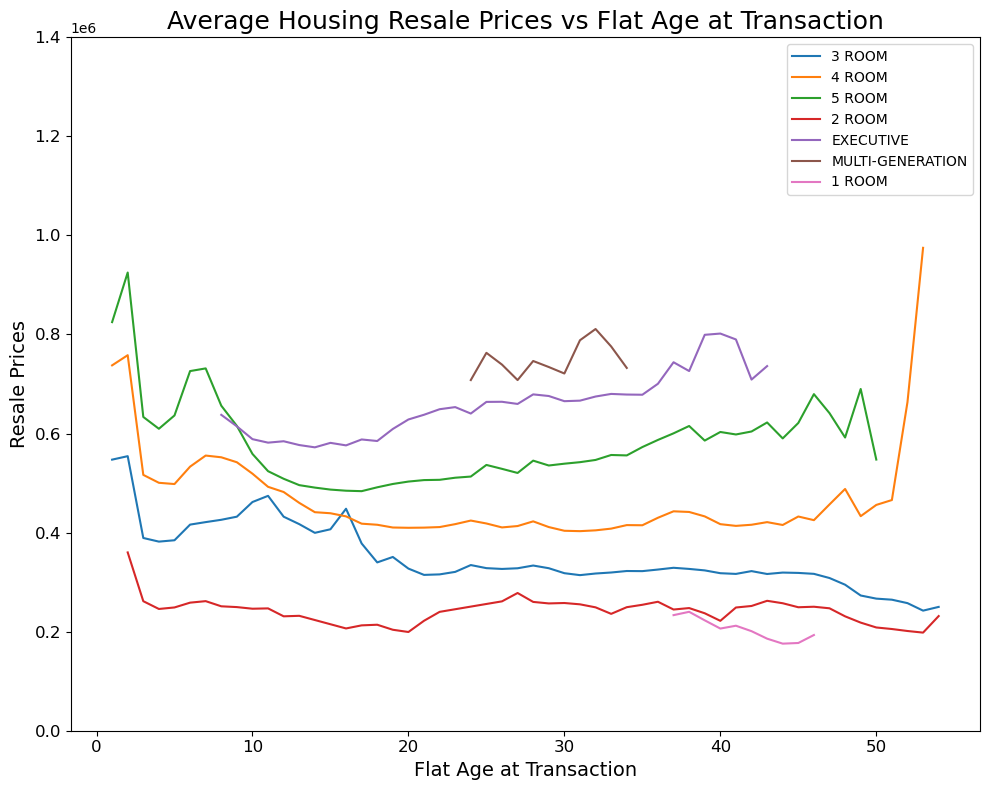

In [106]:
plt.figure(figsize=(10,8))
# Setting hue_order
order=house['flat_type'].sort_values().unique()

# Create lineplot of average resale prices against hdb age at transactions
sns.lineplot(data=age_on_price,x='age_at_tranc',y='resale_price', hue='flat_type')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(xlabel='Flat Age at Transaction', fontsize=14)
plt.ylabel(ylabel='Resale Prices', fontsize=14)
plt.title('Average Housing Resale Prices vs Flat Age at Transaction', fontsize=18)
plt.ylim(0,1400000)
plt.legend(loc='upper right')
plt.tight_layout()

### 3.2 Location of HDB Flat

*block*, *street_name*, *address*, *postal*, *Latitude* and *Longitude* columns represent the location of the HDB flat. I will use *Latitude*** and *Longitude*** columns to measure the distance of the HDB flat from city (Raffles Place MRT). A new column *dist_from_city* column will be created to store the distance from city values. After which, I will drop both *Latitude* and *Longitude* columns.

In [107]:
# Create a new column to calculate the distance from Raffles Place (CBD)
def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude to radians
    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])

    # Compute the Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return c * r

# Raffles Place coordinates
raffles_place_latitude, raffles_place_longitude = 1.2833, 103.8501

# Calculate the distance between each location and Raffles Place
house['dist_from_city'] = haversine_distance(house['Latitude'], house['Longitude'],
                                                       raffles_place_latitude, raffles_place_longitude)

In [108]:
# Checking the average resale price on distance from city
price_dist_city=house.groupby(['dist_from_city', 'flat_type'])['resale_price'].mean().reset_index()

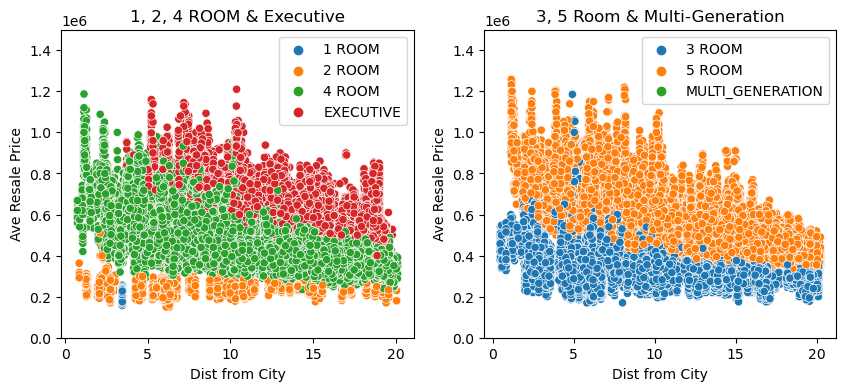

In [109]:
# Filter the DataFrame to create two subsets
rooms1 = ['1 ROOM', '2 ROOM', '4 ROOM','EXECUTIVE']
rooms2 = ['3 ROOM', '5 ROOM', 'MULTI_GENERATION']
price_dist_city1 = price_dist_city[price_dist_city['flat_type'].isin(rooms1)]
price_dist_city2 = price_dist_city[price_dist_city['flat_type'].isin(rooms2)]

# Create two subplots, one for each set of flat types
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

# Plot the first set of rooms on the first subplot
sns.scatterplot(x='dist_from_city', y='resale_price', data=house1, hue='flat_type', hue_order=rooms1, ax=ax1)
ax1.set_title('1, 2, 4 ROOM & Executive')
ax1.set_ylabel(ylabel='Ave Resale Price')
ax1.set_xlabel(xlabel='Dist from City')
ax1.set_ylim(0,1500000)
ax1.legend()

# Plot the second set of rooms on the second subplot
sns.scatterplot(x='dist_from_city', y='resale_price', data=house2, hue='flat_type', hue_order=rooms2, ax=ax2)
ax2.set_title('3, 5 Room & Multi-Generation')
ax2.set_ylabel(ylabel='Ave Resale Price')
ax2.set_xlabel(xlabel='Dist from City')
ax2.set_ylim(0,1500000)
ax2.legend()
# Show the plots
plt.show()

$\color{red}{\text{Location of HDB Flat Analysis:}}$

As can be seen from the Dist. from City scatterplot, there is a decrease in HDB housing resale prices as the distance from the city increases till 12.5km for the 4 Room, 5 Room and Executive flats. After 12.5km, the HDB housing resale prices stabilise for the 4 Room, but continues to decrease for the 5 Room and Executive.

For the 3 Room, the HDB housing resale prices decrease as the distance from city increases to 5km. After which, the HDB housing resale prices stabilise.

For the 2 Room, there do not seem to be much changes in the HDB housing resale prices as the distance from city increases.

For the 1 Room, the train.csv only has data from this particular area in Bukit Merah for the time period of analysis.

Likewise for the Multi-Generation, there is one cluster of Mutlti-Generation data points that is centered at 15km from city and there is another data point at approximately 6km from city. Hence, there is not much data to infer whether distance from city can affect the Multi-Generation housing resale price.

## 4. Recap of Selected Features 

Now that I have analyzed the train.csv dataset and kept the features which are deemed to be correlated to the HDB housing resale price, I create a Data Dictionary for the features chosen.

#### Data Dictionary for the datasets chosen

|Feature|Type|Description|
|---|---|---|
|town|object|HDB Residential Towns|
|flat_type|object|Number of Rooms|
|floor_model|object|Model of the flat|
|floor_area_sqm|float|Floor Area in square meter|
|resale_price|float|Flat Price|
|Tranc_Year|int|The year the flat was bought|
|mid|int|The storey level of the flat|
|mrt_nearest_distance|float|The distance between the flat and the nearest MRT station|
|dist_from_city|flaot|The distance of the flat from the city(Raffles Place)|
|age_at_tranc|int|The age of the flat|

In [110]:
# Creating new dataframe house_new
house_new = house[['flat_type', 'floor_area_sqm', 'flat_model','resale_price','town',
               'Tranc_Year', 'mid', 'mrt_nearest_distance', 'dist_from_city', 'age_at_tranc']]

In [111]:
# Exporting to csv
house_new.to_csv('./datasets/train_new.csv',index=False)